# Post Analysis

**This notebook is used to analyze the different posts done during the communication campaign**

## Import libraries

In [1]:
# Import standard libraries
import os

In [2]:
# Import librairies for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
# Import internal modules
from src import plot
from src import utility
from src import features

## Upload data

In [4]:
# Specifiy here the path your data and image folder
DATA_PATH = f'{os.getcwd()}/data'
IMG_PATH = f'{os.getcwd()}/img'

In [5]:
# Specifiy here the name of the file you want to use for this analysis
POST_FILE = 'instagram-posts_2023-08-07_2023-09-15.csv'
REEL_FILE = 'instagram-reels_2023-08-07_2023-09-15.csv'
STORY_FILE = 'instagram-stories_2023-08-07_2023-09-15.csv'

In [6]:
# Upload the data and put date as index (rows are sorted by date)
df1 = utility.read_file(POST_FILE, date_col='Timestamp', data_path=DATA_PATH)
df2 = utility.read_file(REEL_FILE, date_col='Date', data_path=DATA_PATH)
df3 = utility.read_file(STORY_FILE, date_col='Timestamp', data_path=DATA_PATH)

In [7]:
# Put the dataframe in a dictionnary (used to apply functions to the different dataset in parallel)
dfs_dict = {'post':df1, 'reel':df2, 'story':df3}

## Add features

In [8]:
# Set the numero of post for each publication
features.set_publication_numero(dfs_dict)

In [9]:
# Count the number of characters for each publication
features.count_content_length(dfs_dict)

In [10]:
# Count the time between the actual and the last publication
features.time_since_last_publication(dfs_dict)

## Process data

In [11]:
## Concat the different dataframe into a single one
df = pd.concat([df1,df2,df3], axis=0)
# Sort by dates
df.sort_index(inplace=True)

In [12]:
# Visualize the different columns provided
df.columns

Index(['Id', 'Type', 'Image', 'URL', 'Content', 'Impressions (Organic)',
       'Impressions (Paid)', 'Reach (Organic)', 'Reach (Paid)', 'Likes',
       'Saved', 'Comments', 'Clicks', 'Interactions', 'Engagement',
       'Video Views (Organic)', 'Video Views (Paid)', 'Post clicks (Paid)',
       'Post Interactions (Paid)', 'Spend', 'publication_number',
       'content_length', 'time_last_publication', 'Title', 'Likes (Organic)',
       'Saved (Organic)', 'Comments (Organic)', 'Interactions (Organic)',
       'Interactions (Paid)', 'Post URL', 'Media URL', 'Replies', 'Taps Back',
       'Taps Forward', 'Exits'],
      dtype='object')

In [13]:
# Put the dataframe in a dictionnary (used to apply functions to the different dataset in parallel)
df_dict = {'global':df}

In [14]:
# Set the numero of post for each publication
features.set_publication_numero(df_dict)
# Count the time between the actual and the last publication
features.time_since_last_publication(df_dict)

## Explore

In [15]:
plot.mean_plot(df_dict, save_img_path=f'{IMG_PATH}')

Impressions (Organic)       object
Impressions (Paid)          object
Reach (Organic)             object
Reach (Paid)                object
Likes                       object
Saved                       object
Comments                    object
Clicks                      object
Interactions                object
Engagement                  object
Video Views (Organic)       object
Video Views (Paid)          object
Post clicks (Paid)          object
Post Interactions (Paid)    object
Spend                       object
publication_number          object
content_length              object
Likes (Organic)             object
Saved (Organic)             object
Comments (Organic)          object
Interactions (Organic)      object
Interactions (Paid)         object
Replies                     object
Taps Back                   object
Taps Forward                object
Exits                       object
dtype: object


DataError: No numeric types to aggregate

<Figure size 9600x3200 with 0 Axes>

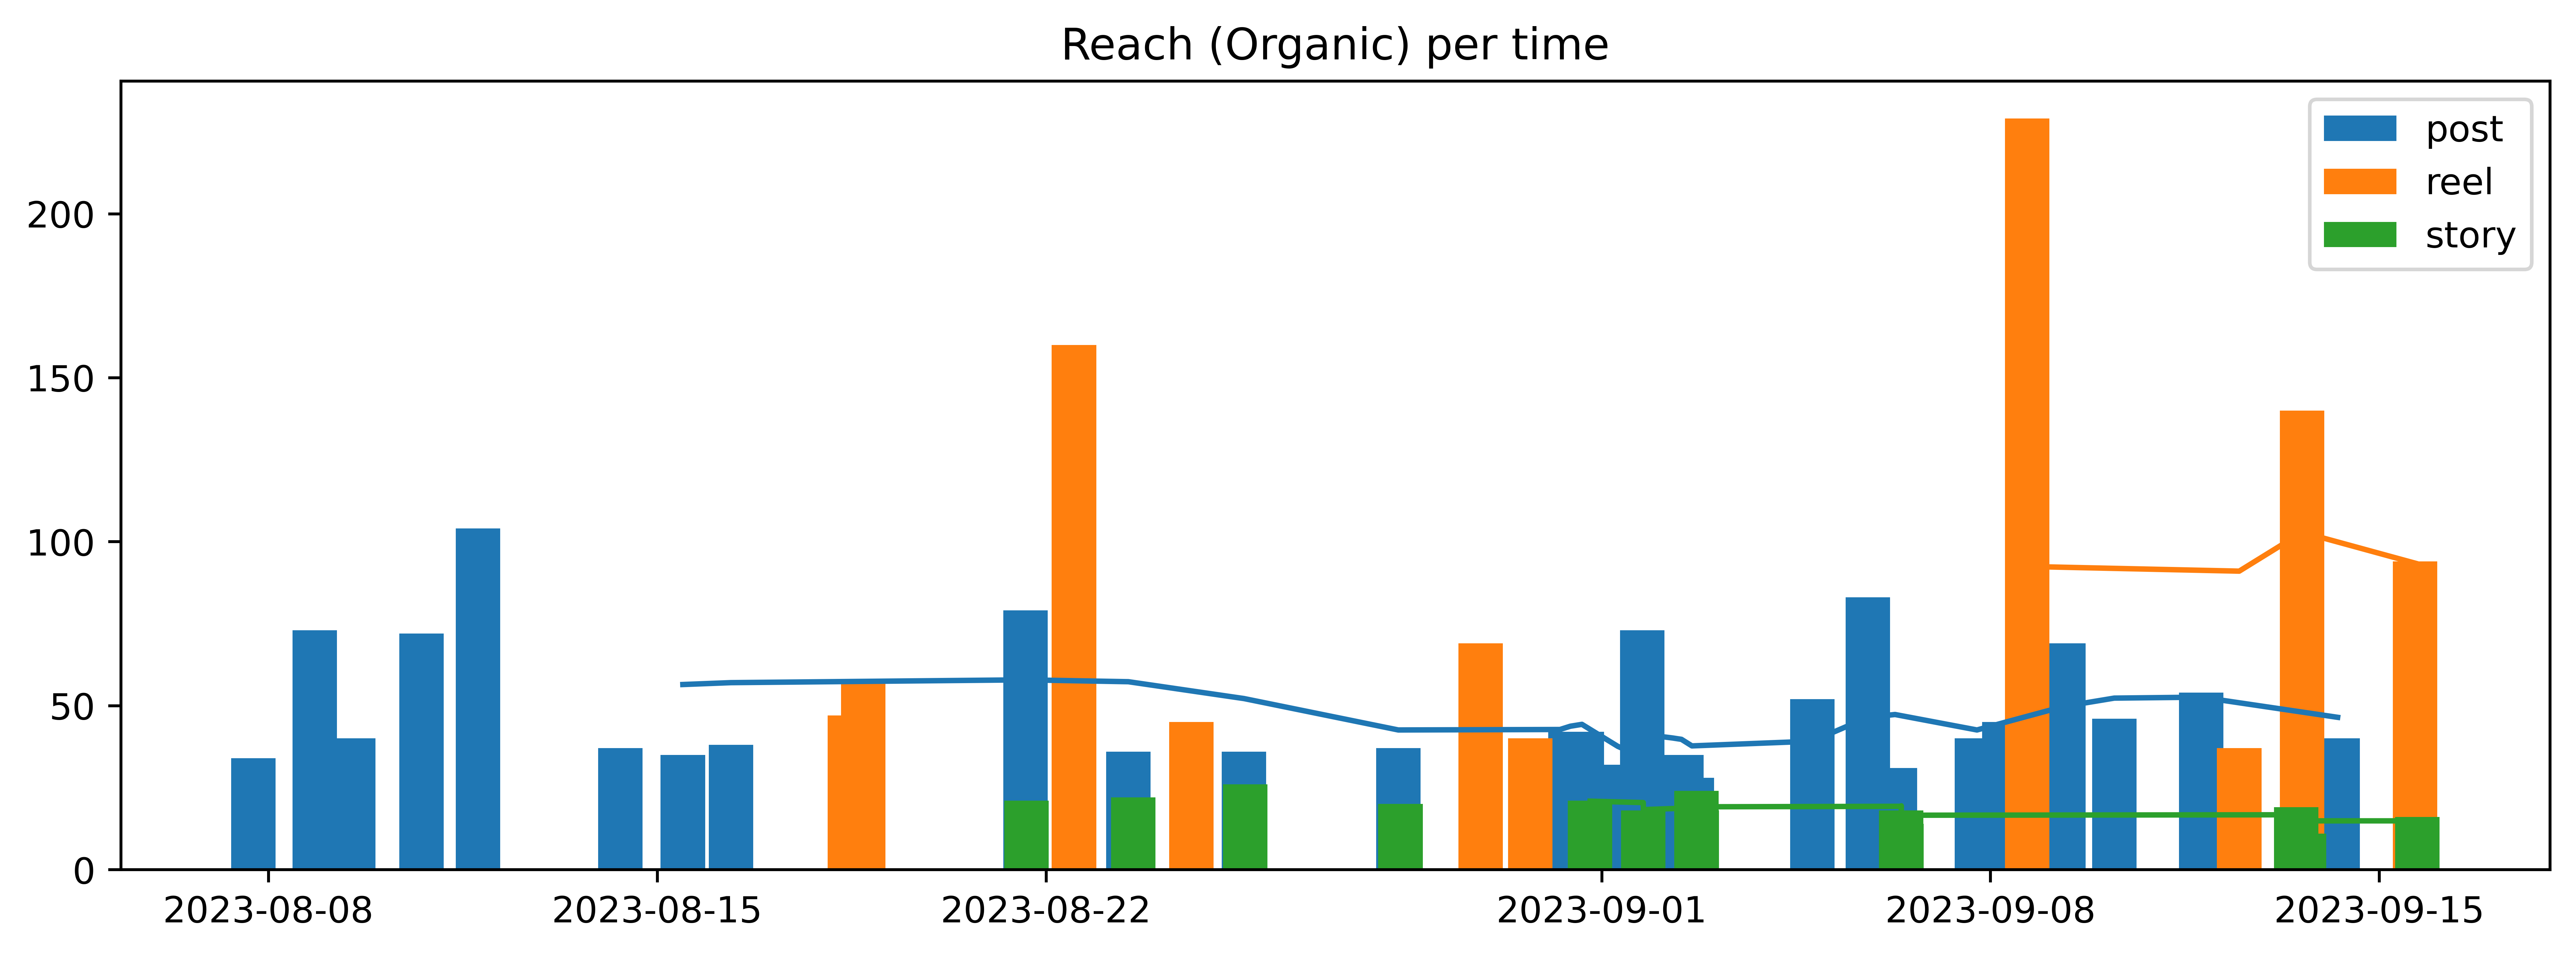

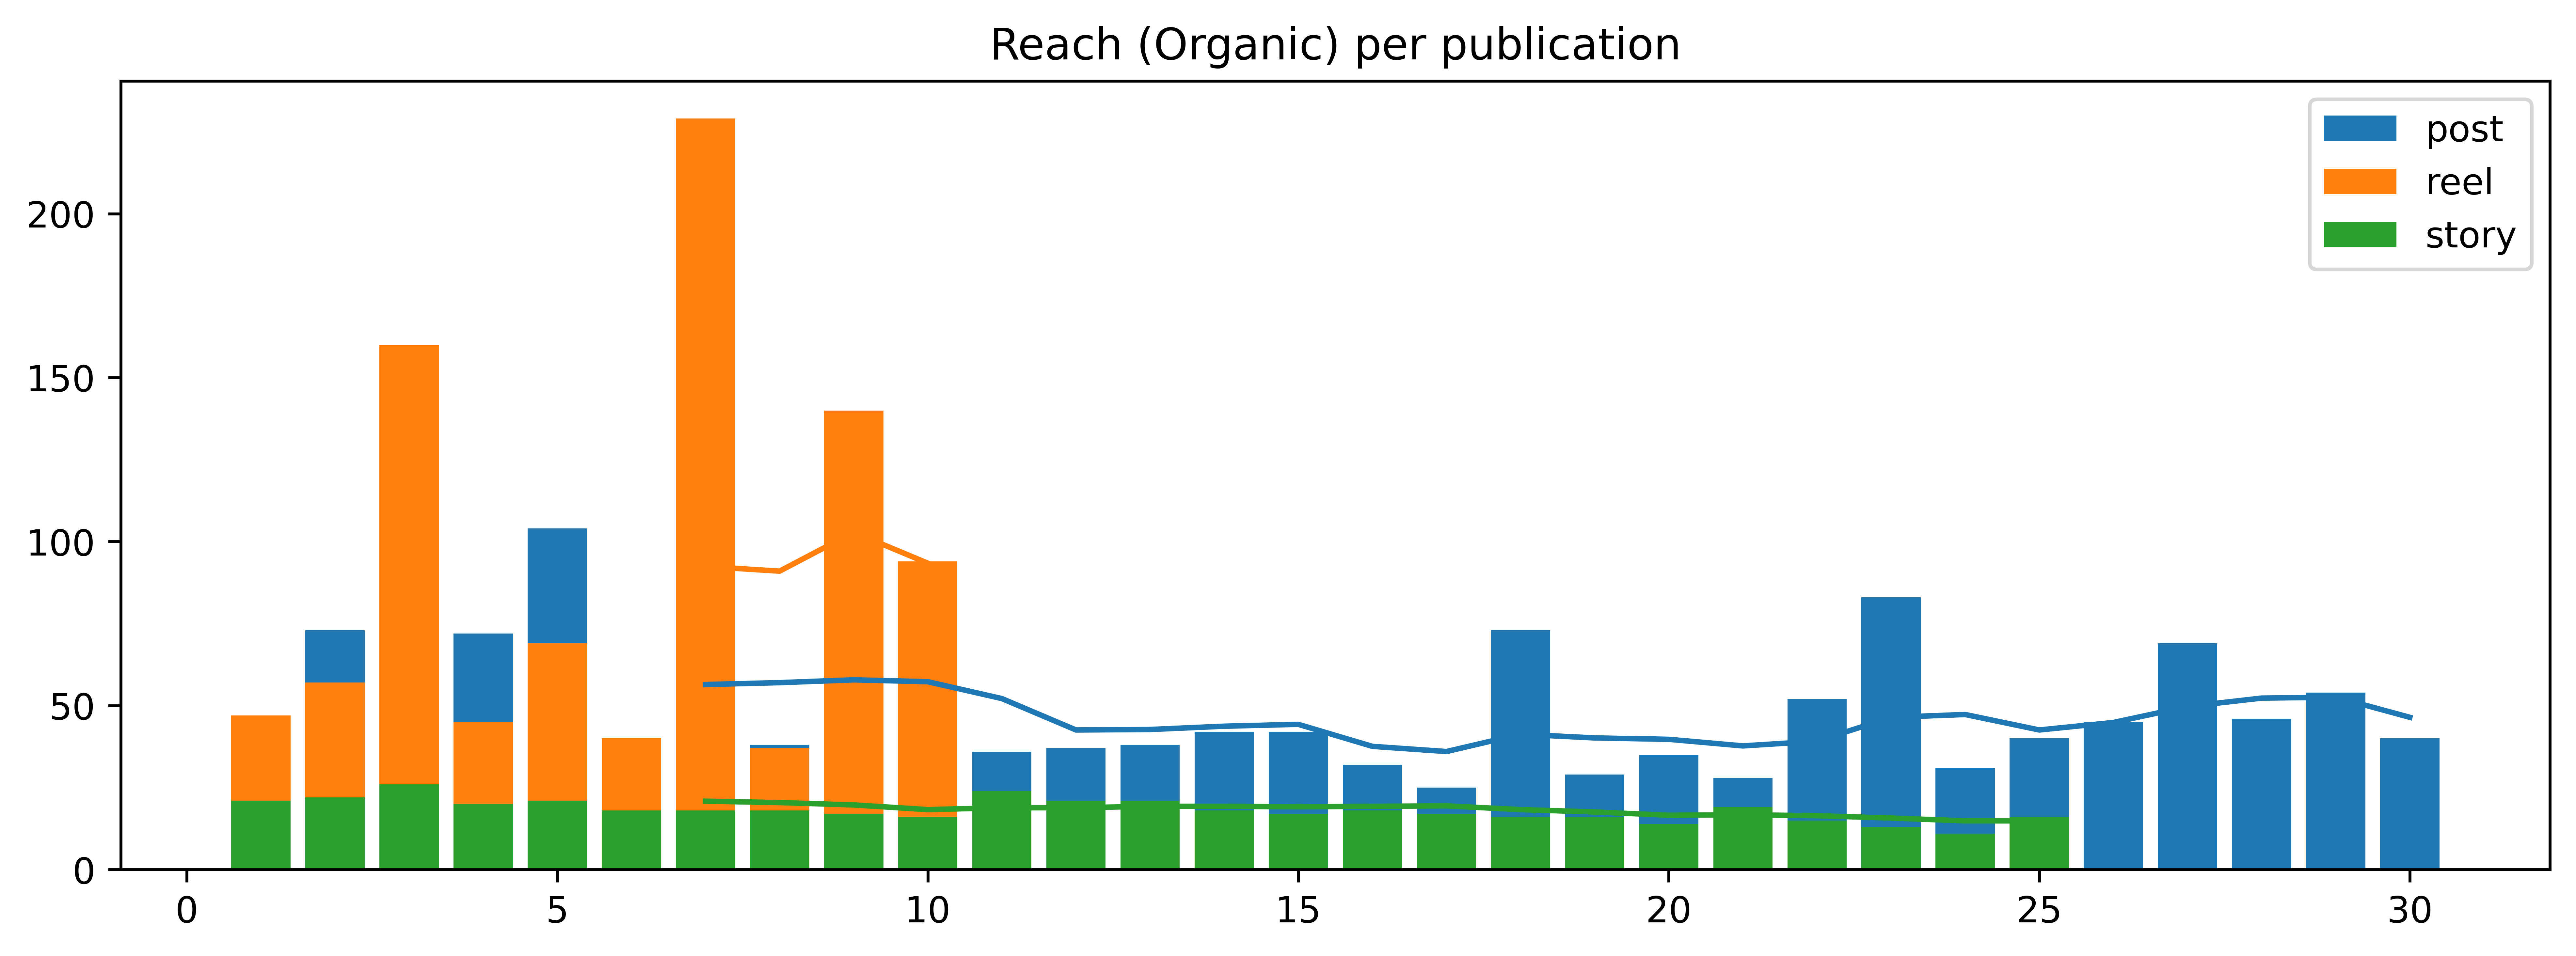

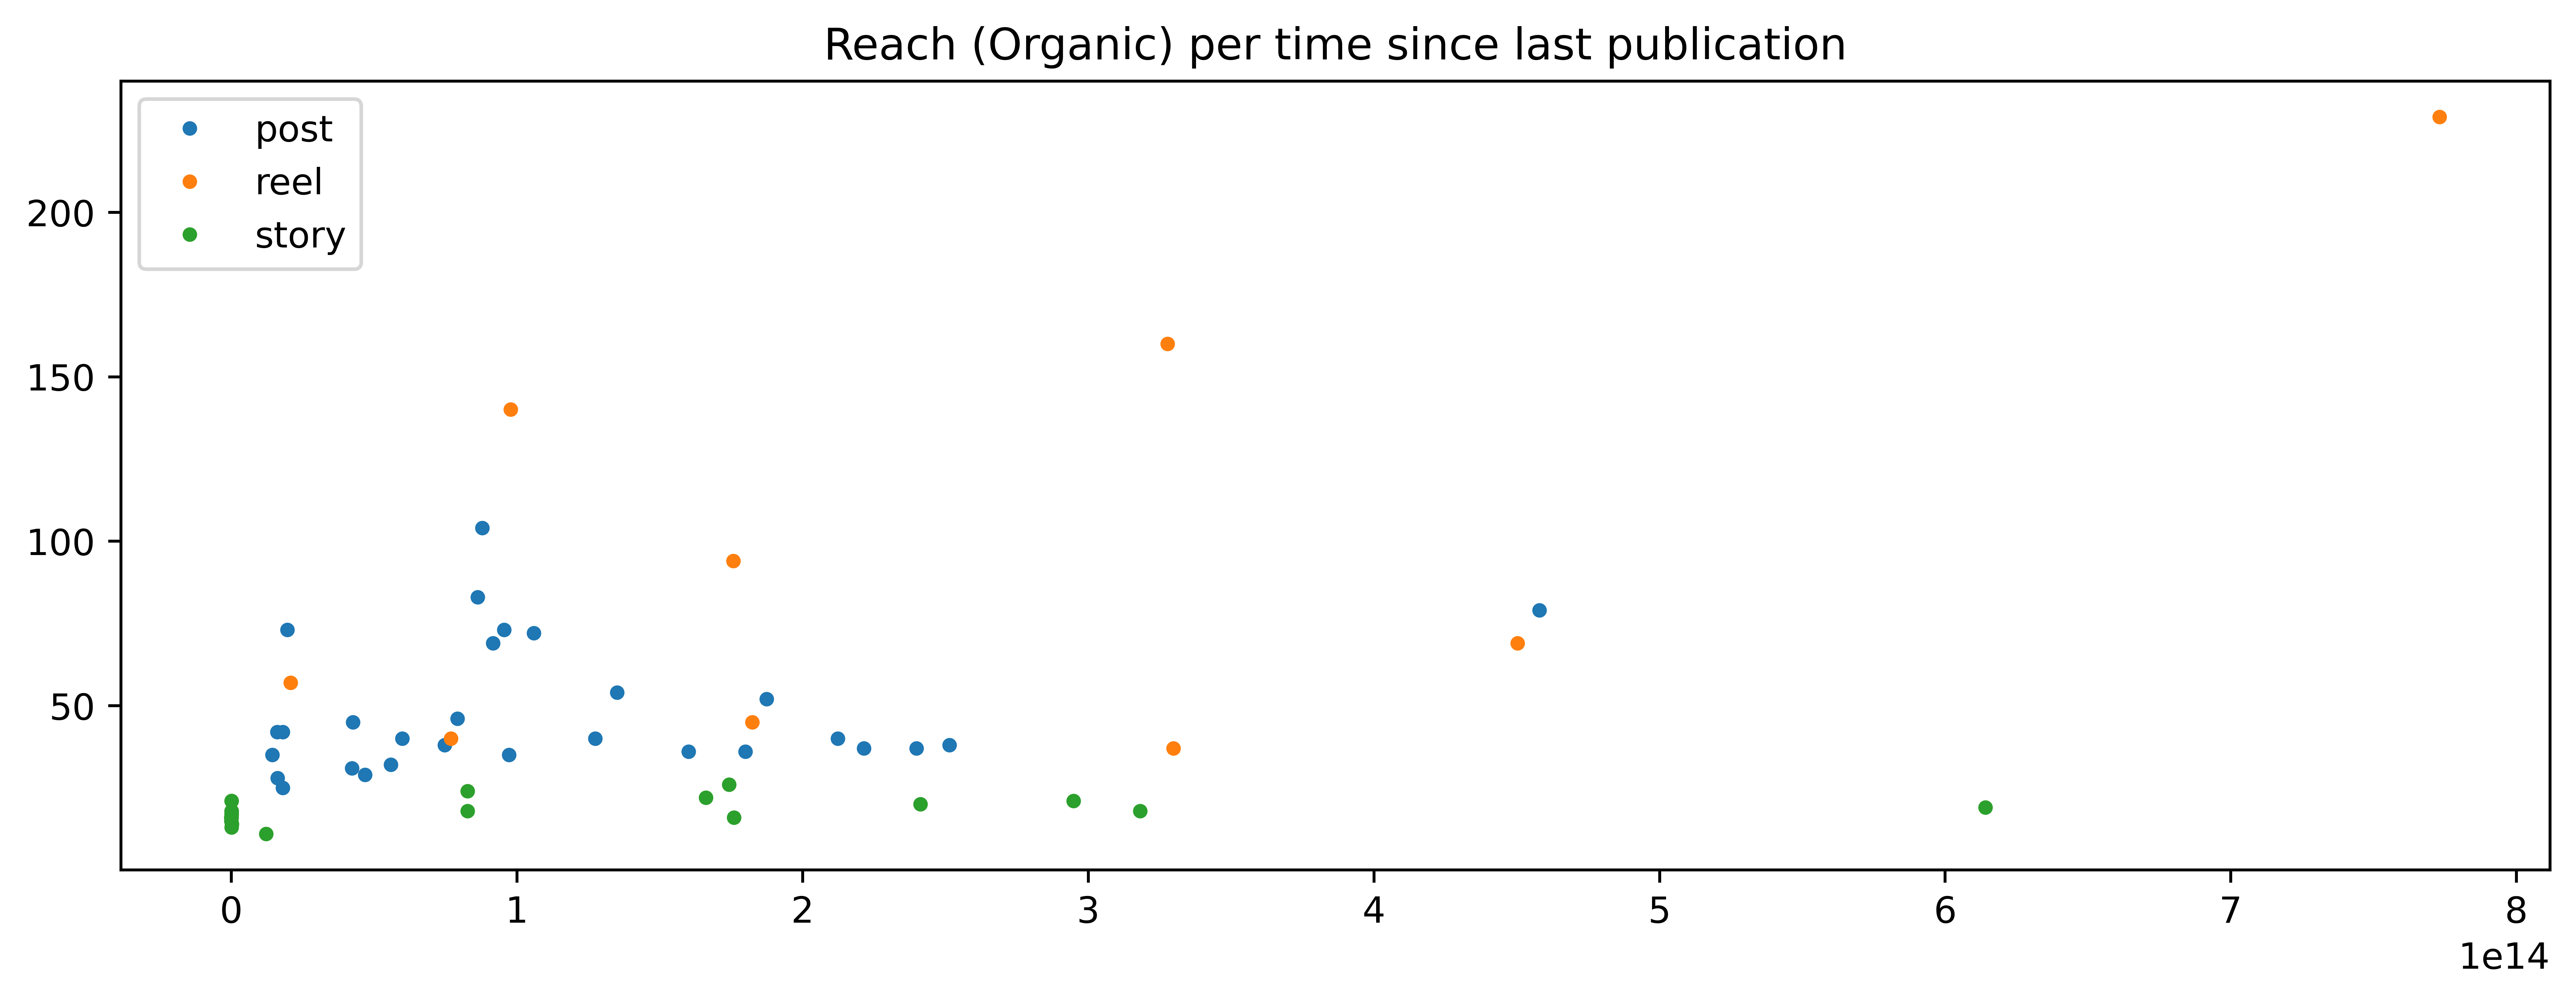

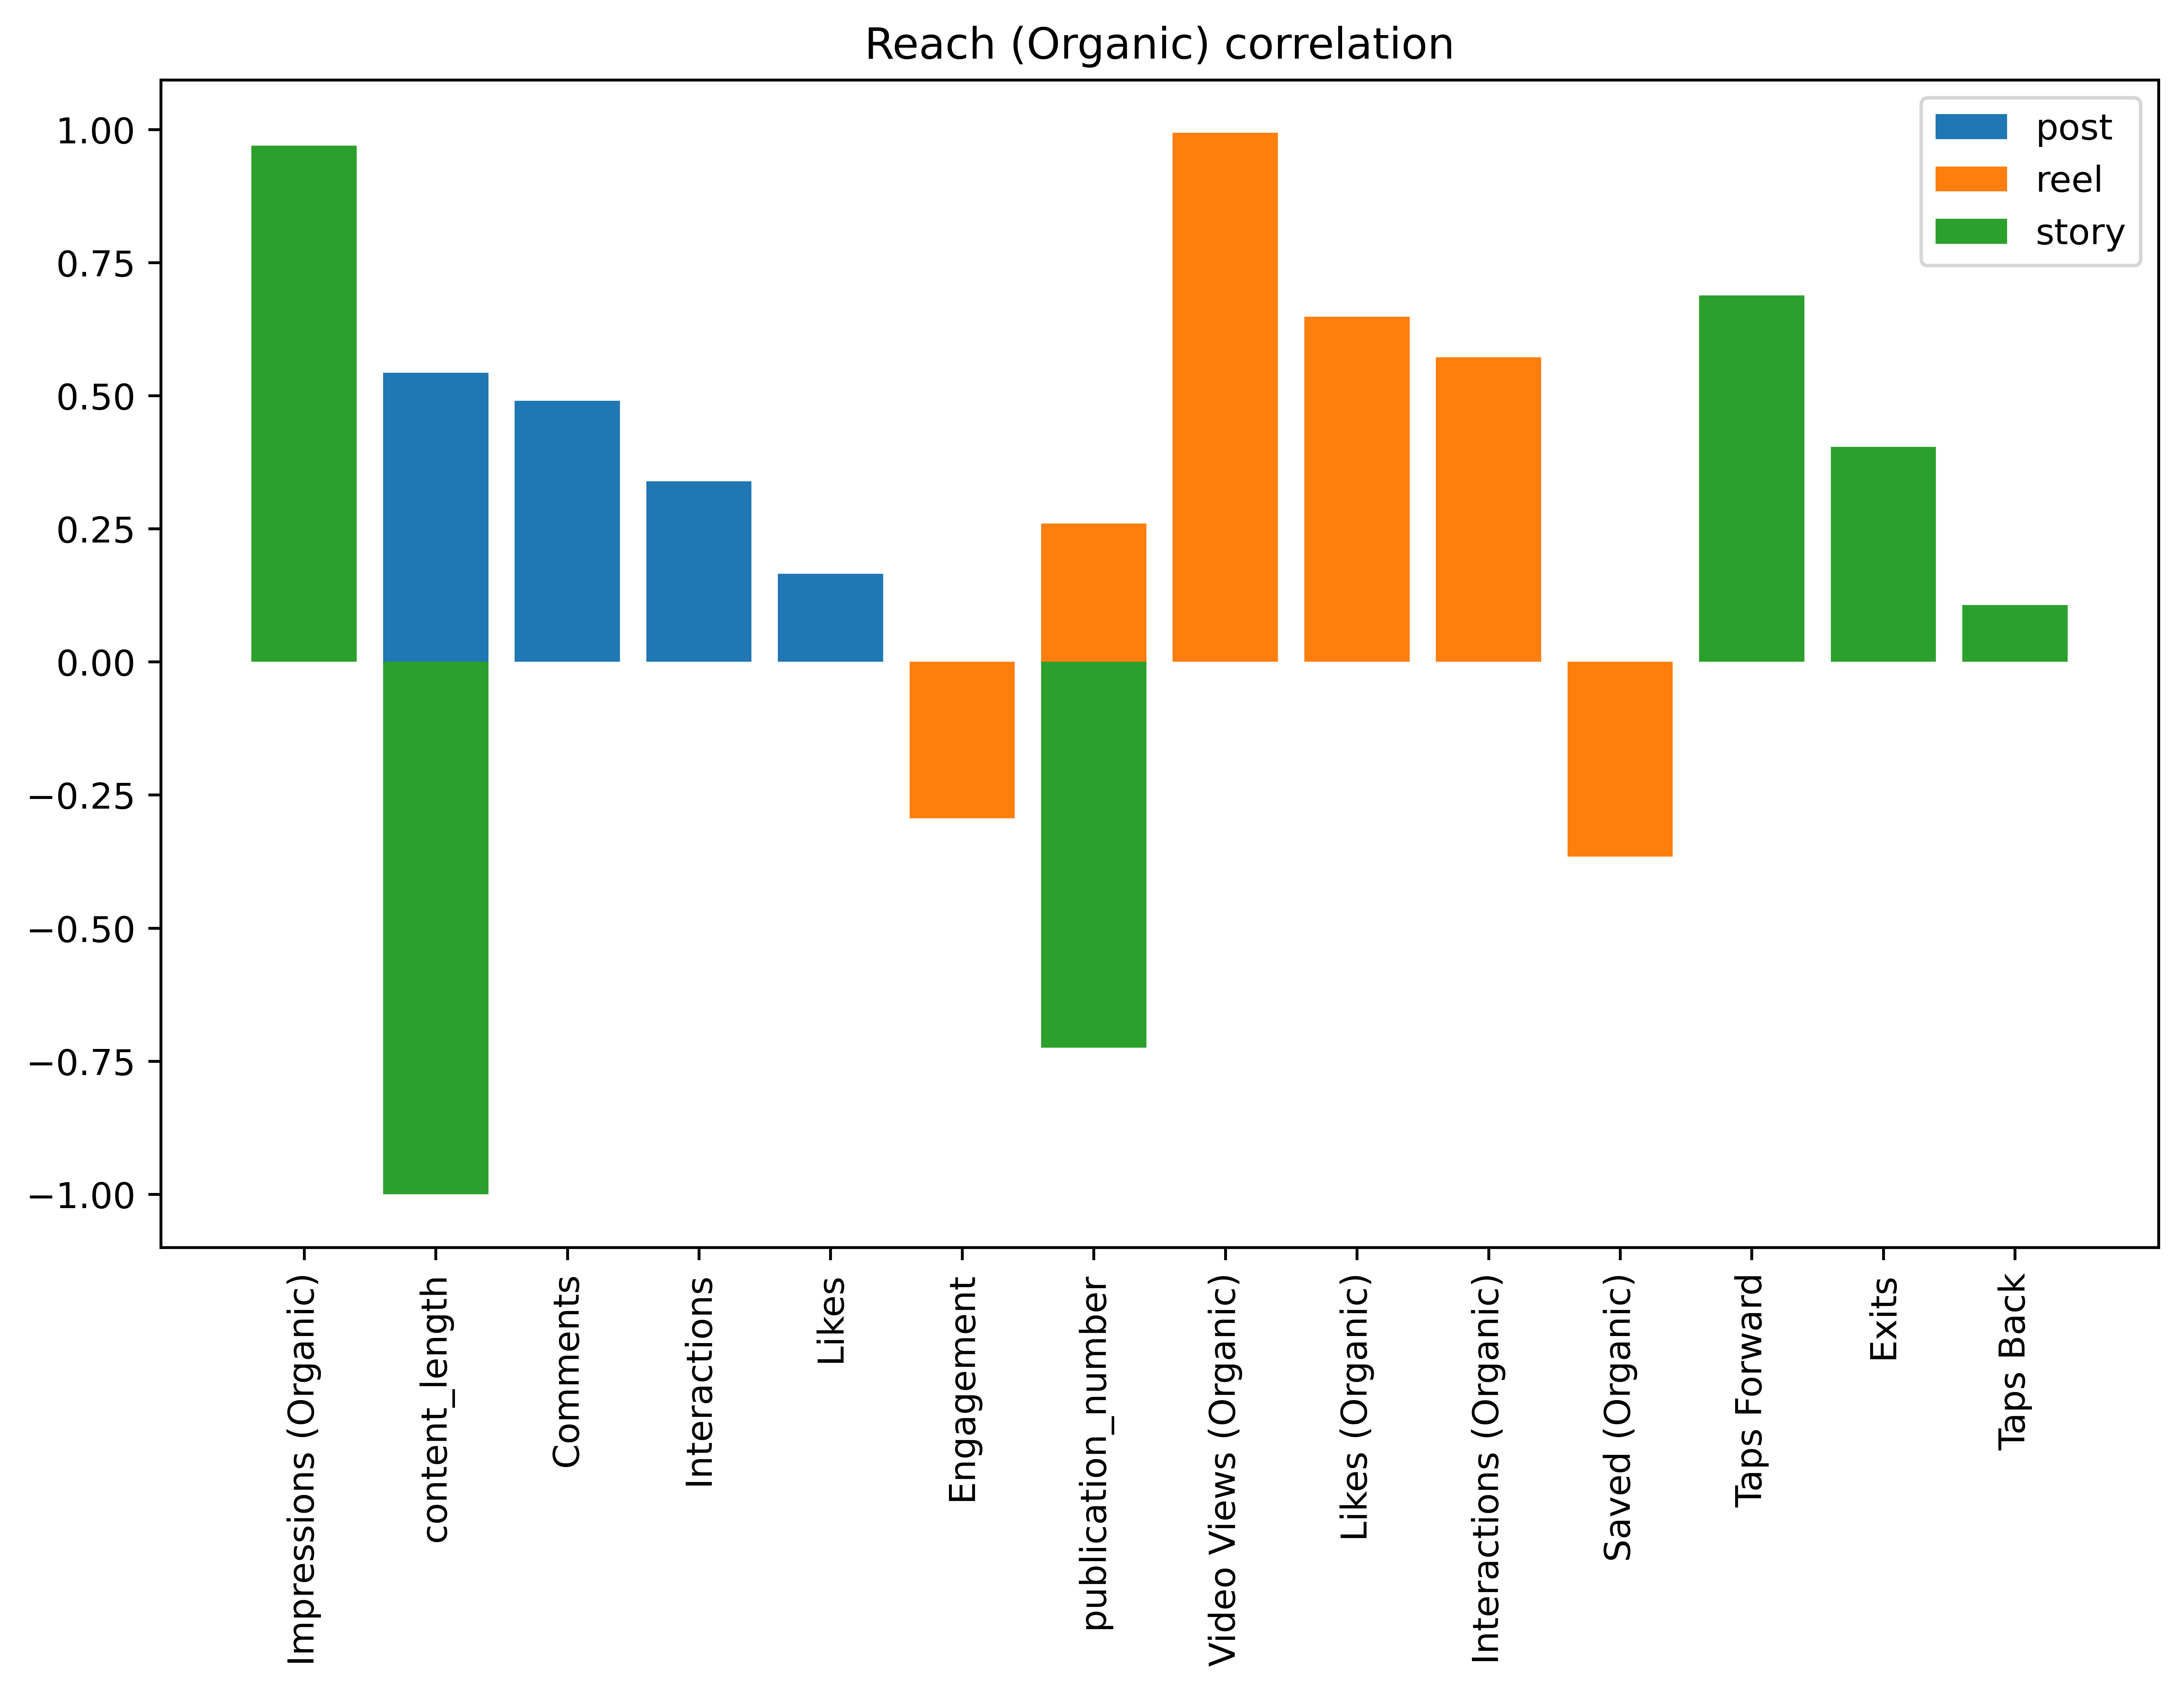

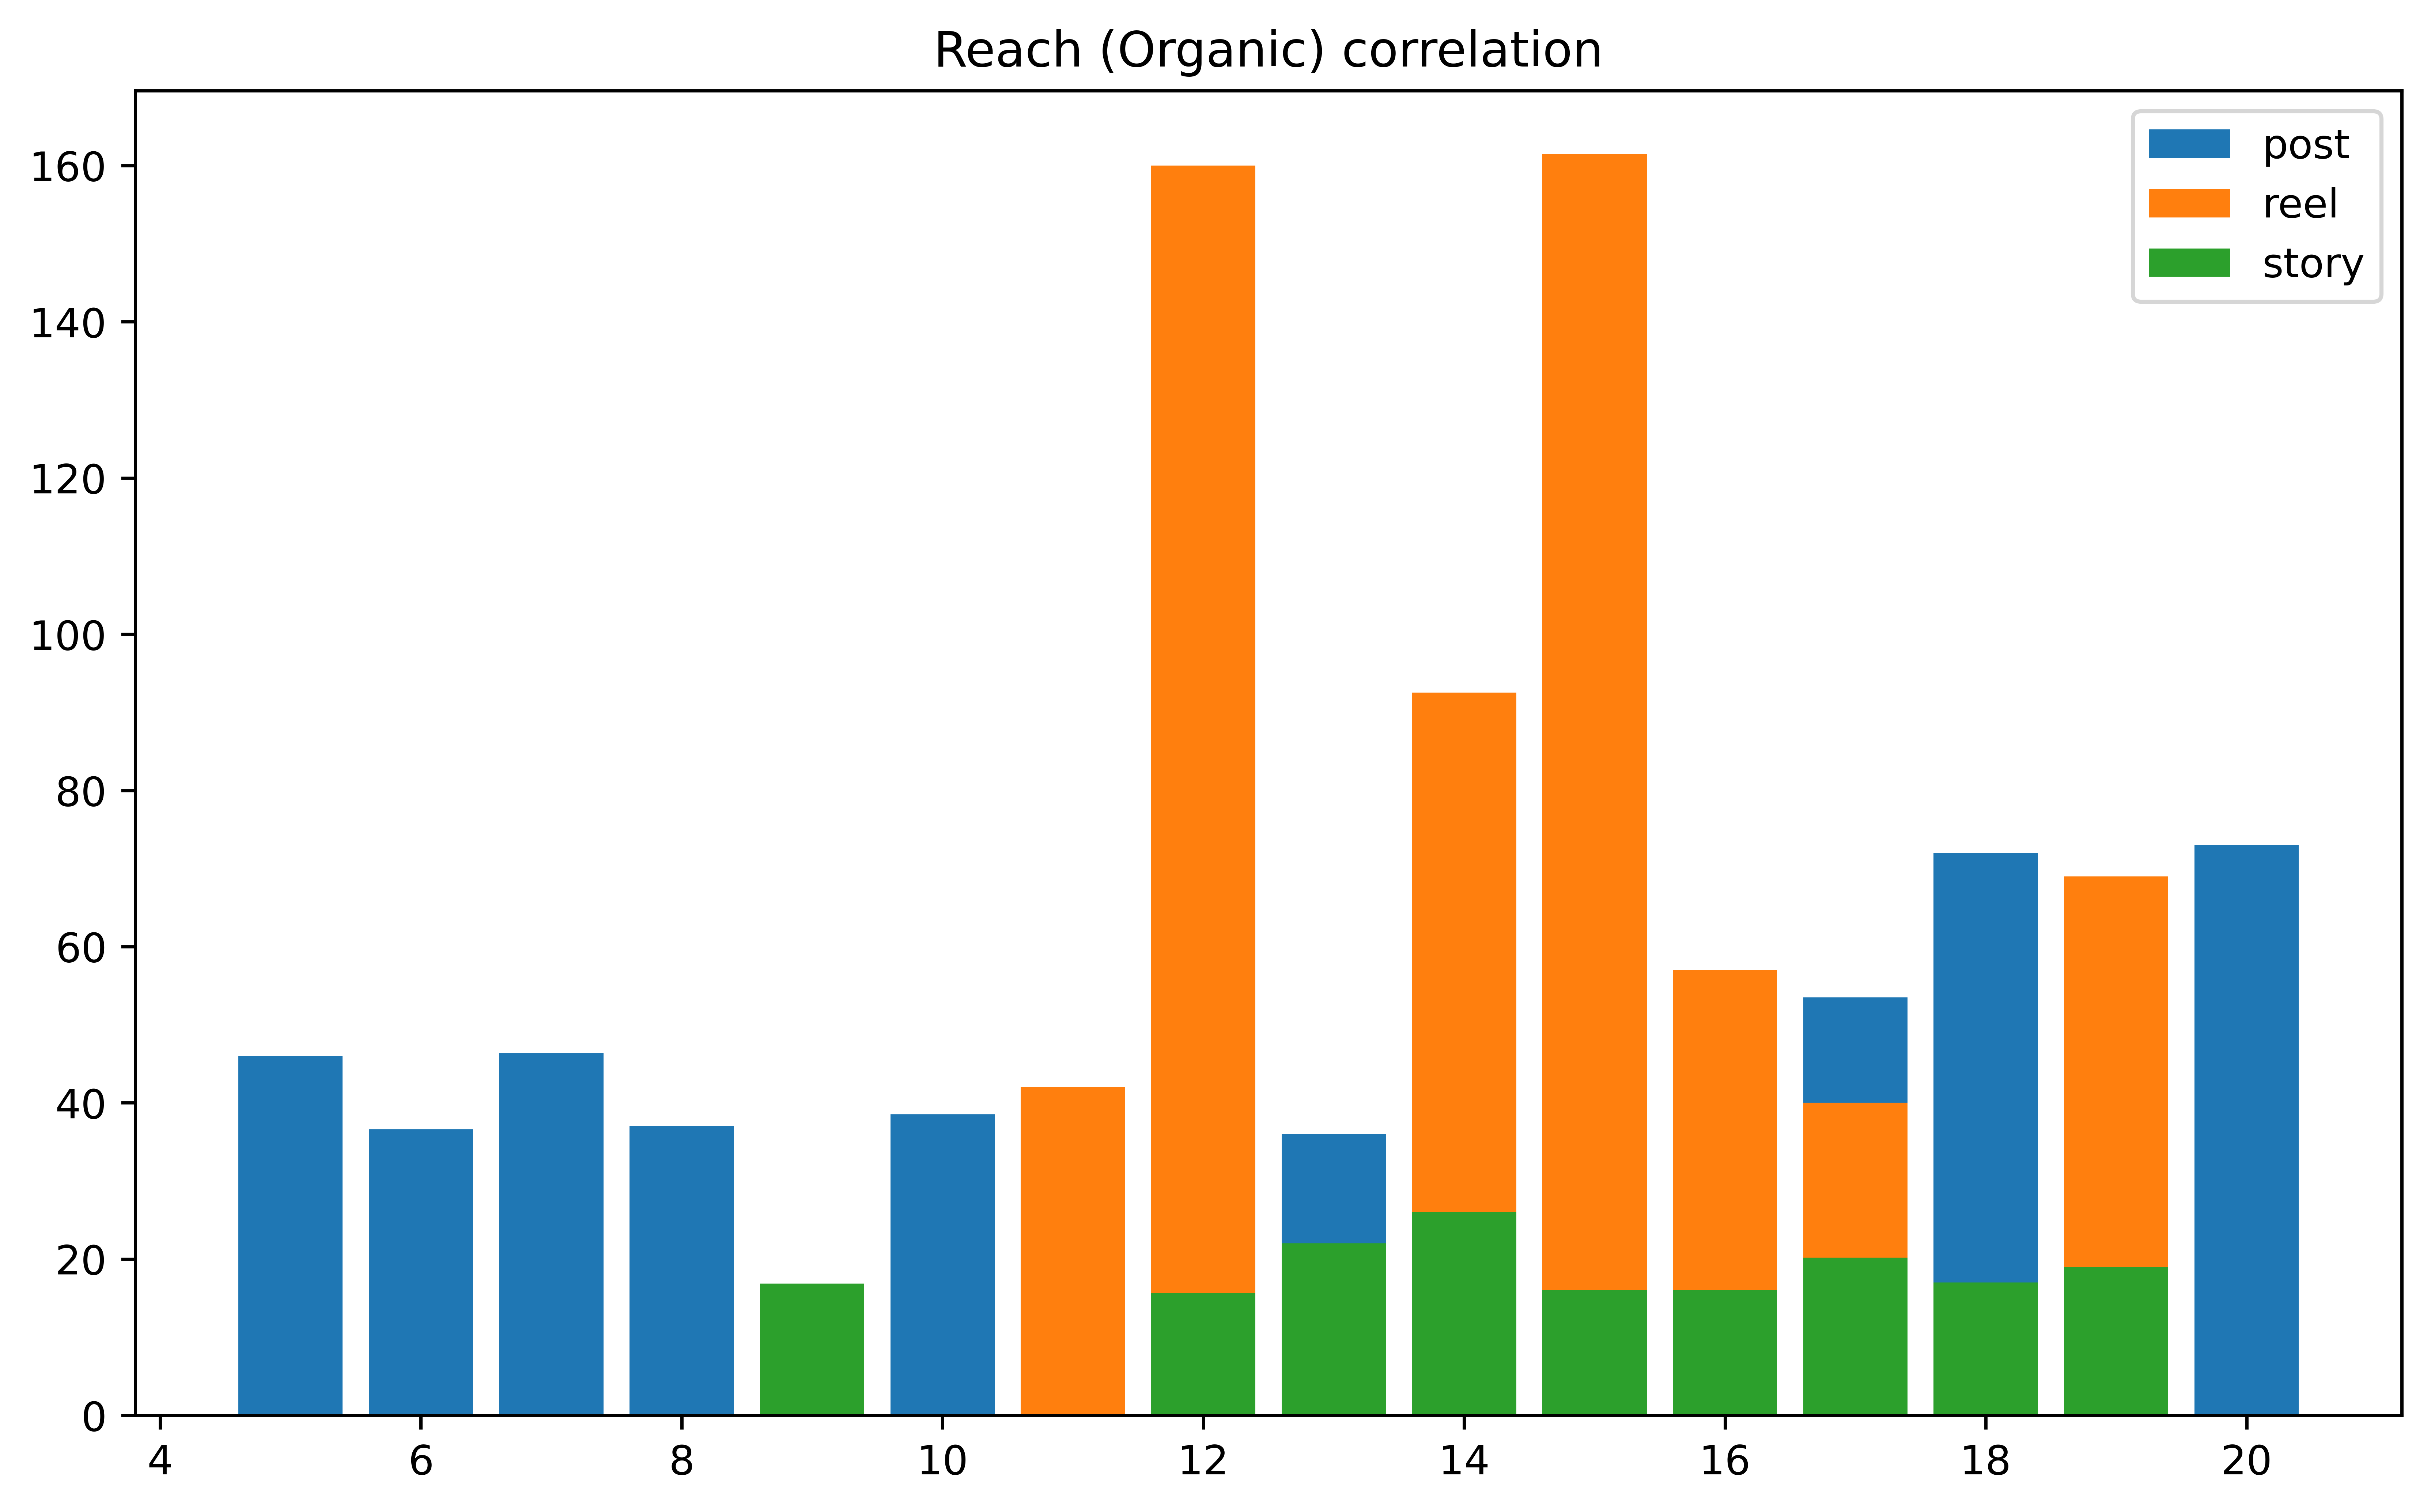

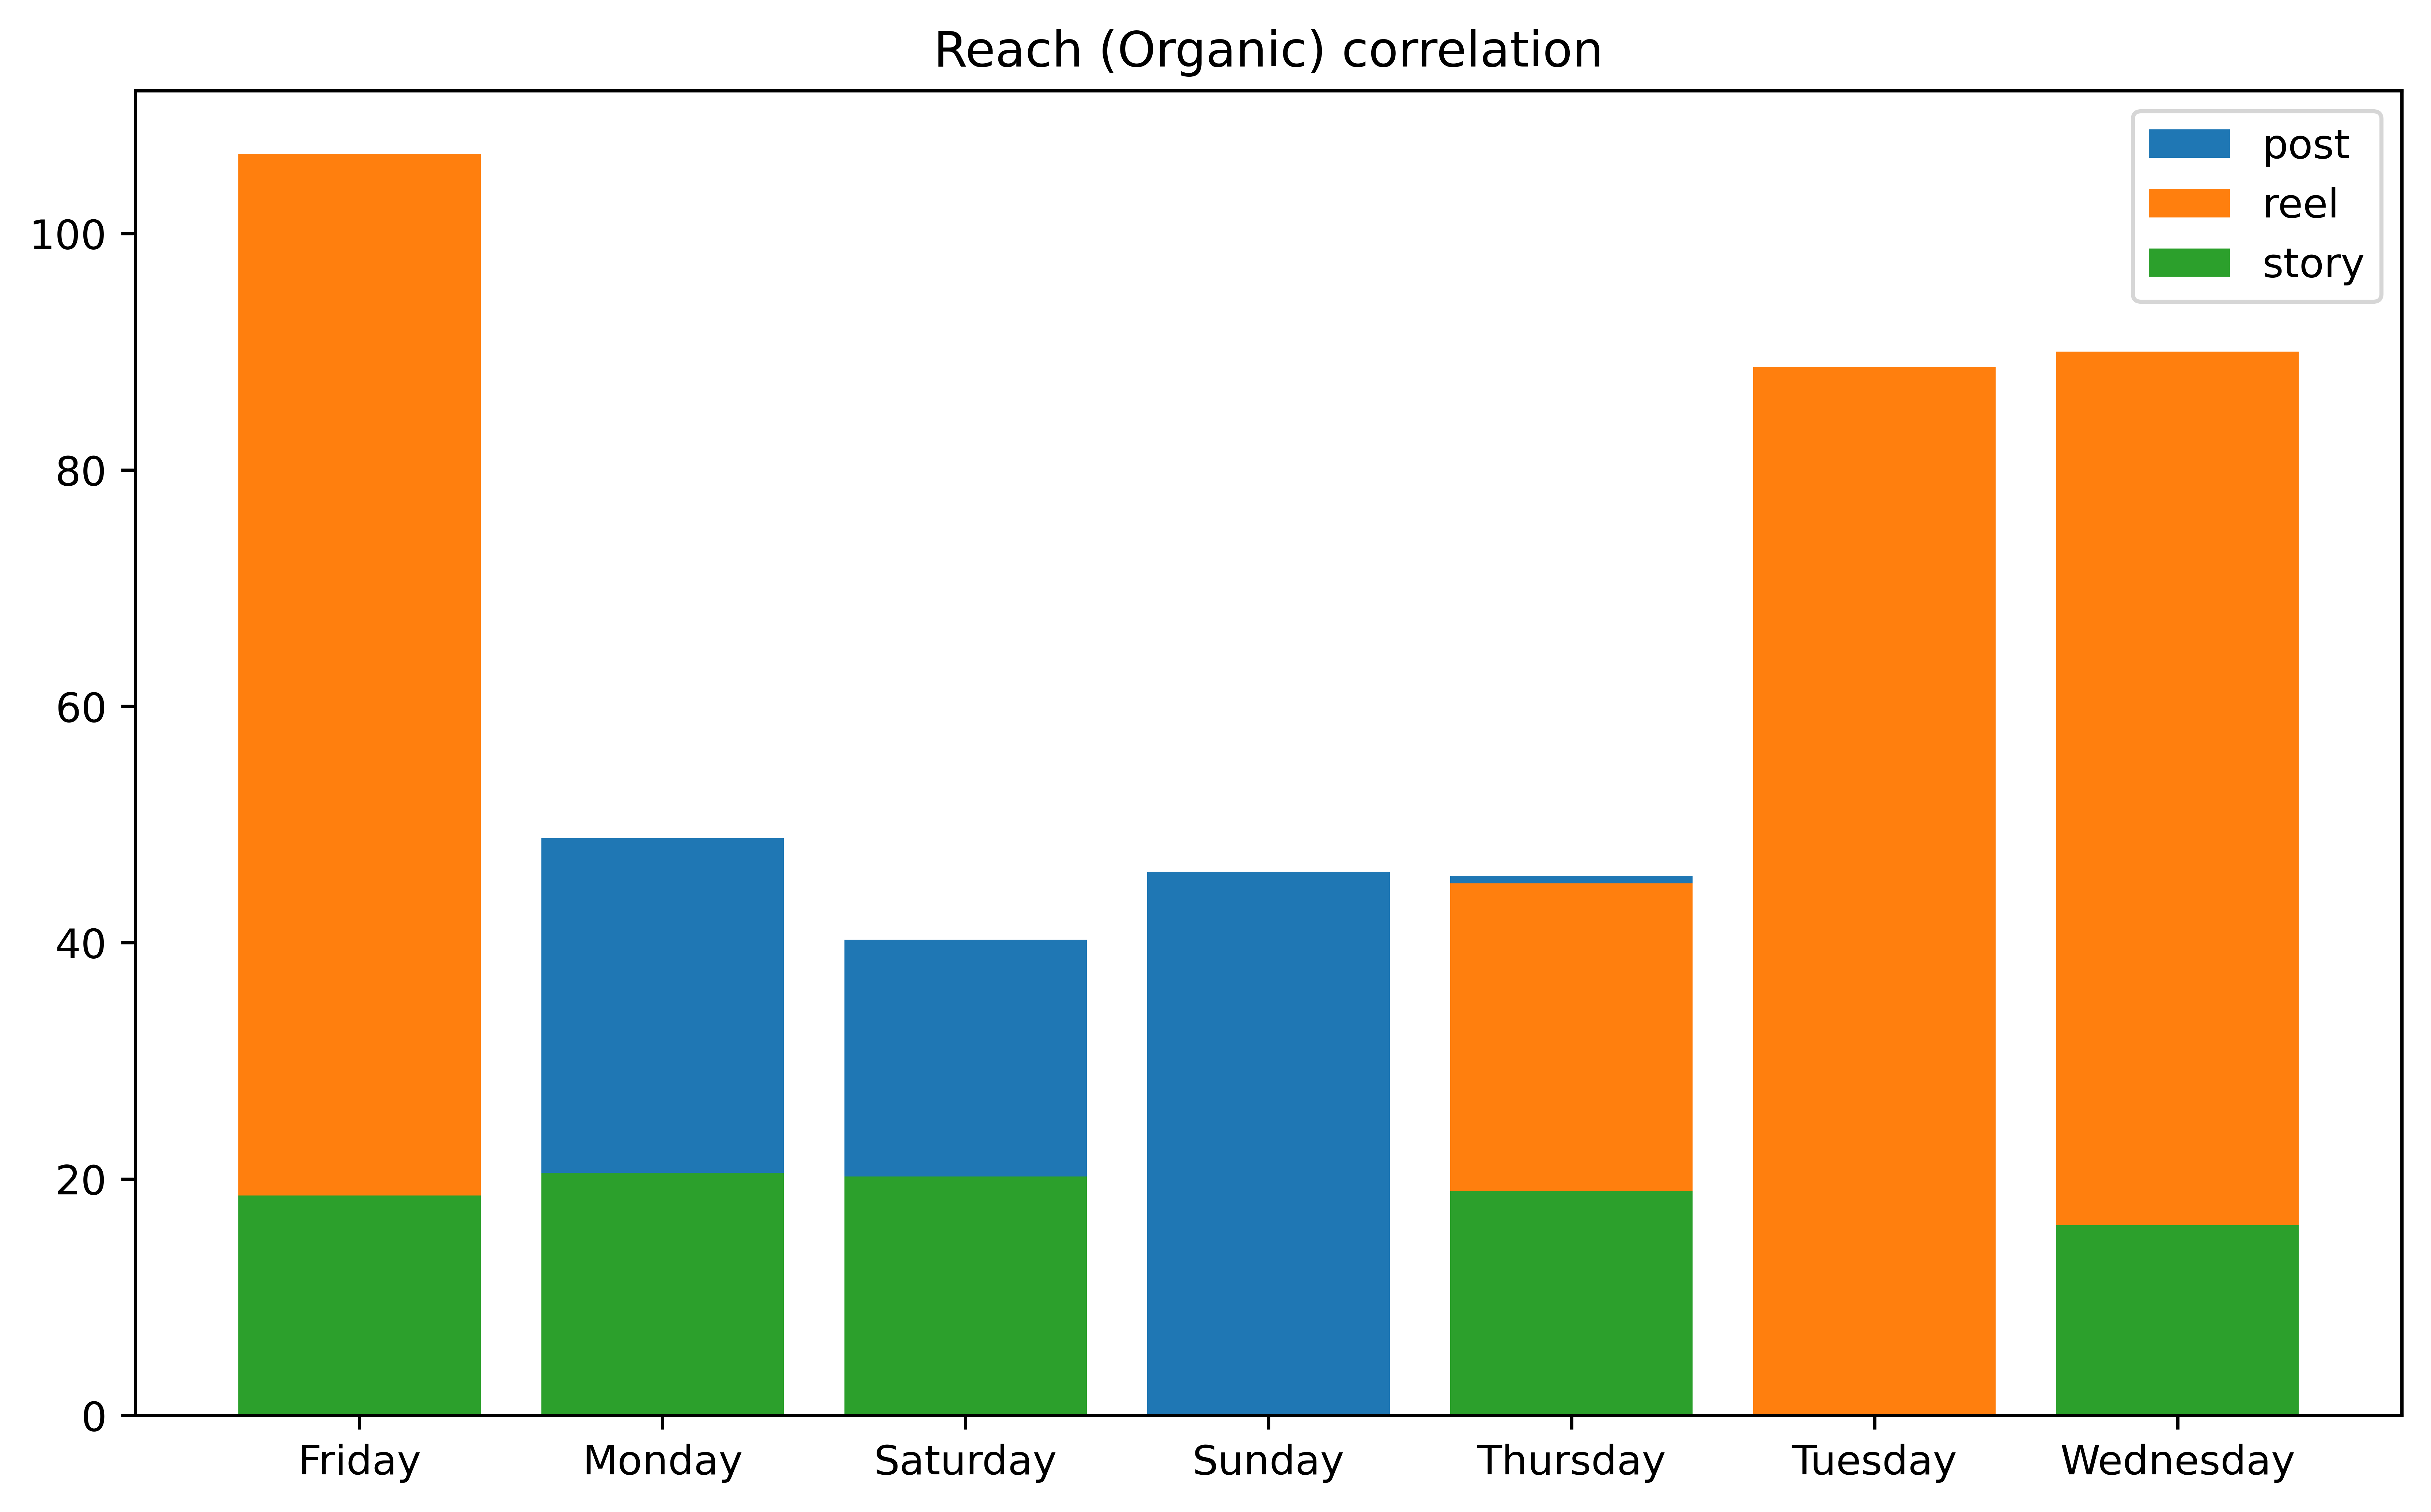

In [ ]:
# Plot different graph, allowing an analysis of the Reach during the communication campaign
plot.plot_chain(dfs_dict, 'Reach (Organic)', save_img_path=f'{IMG_PATH}/Reach')

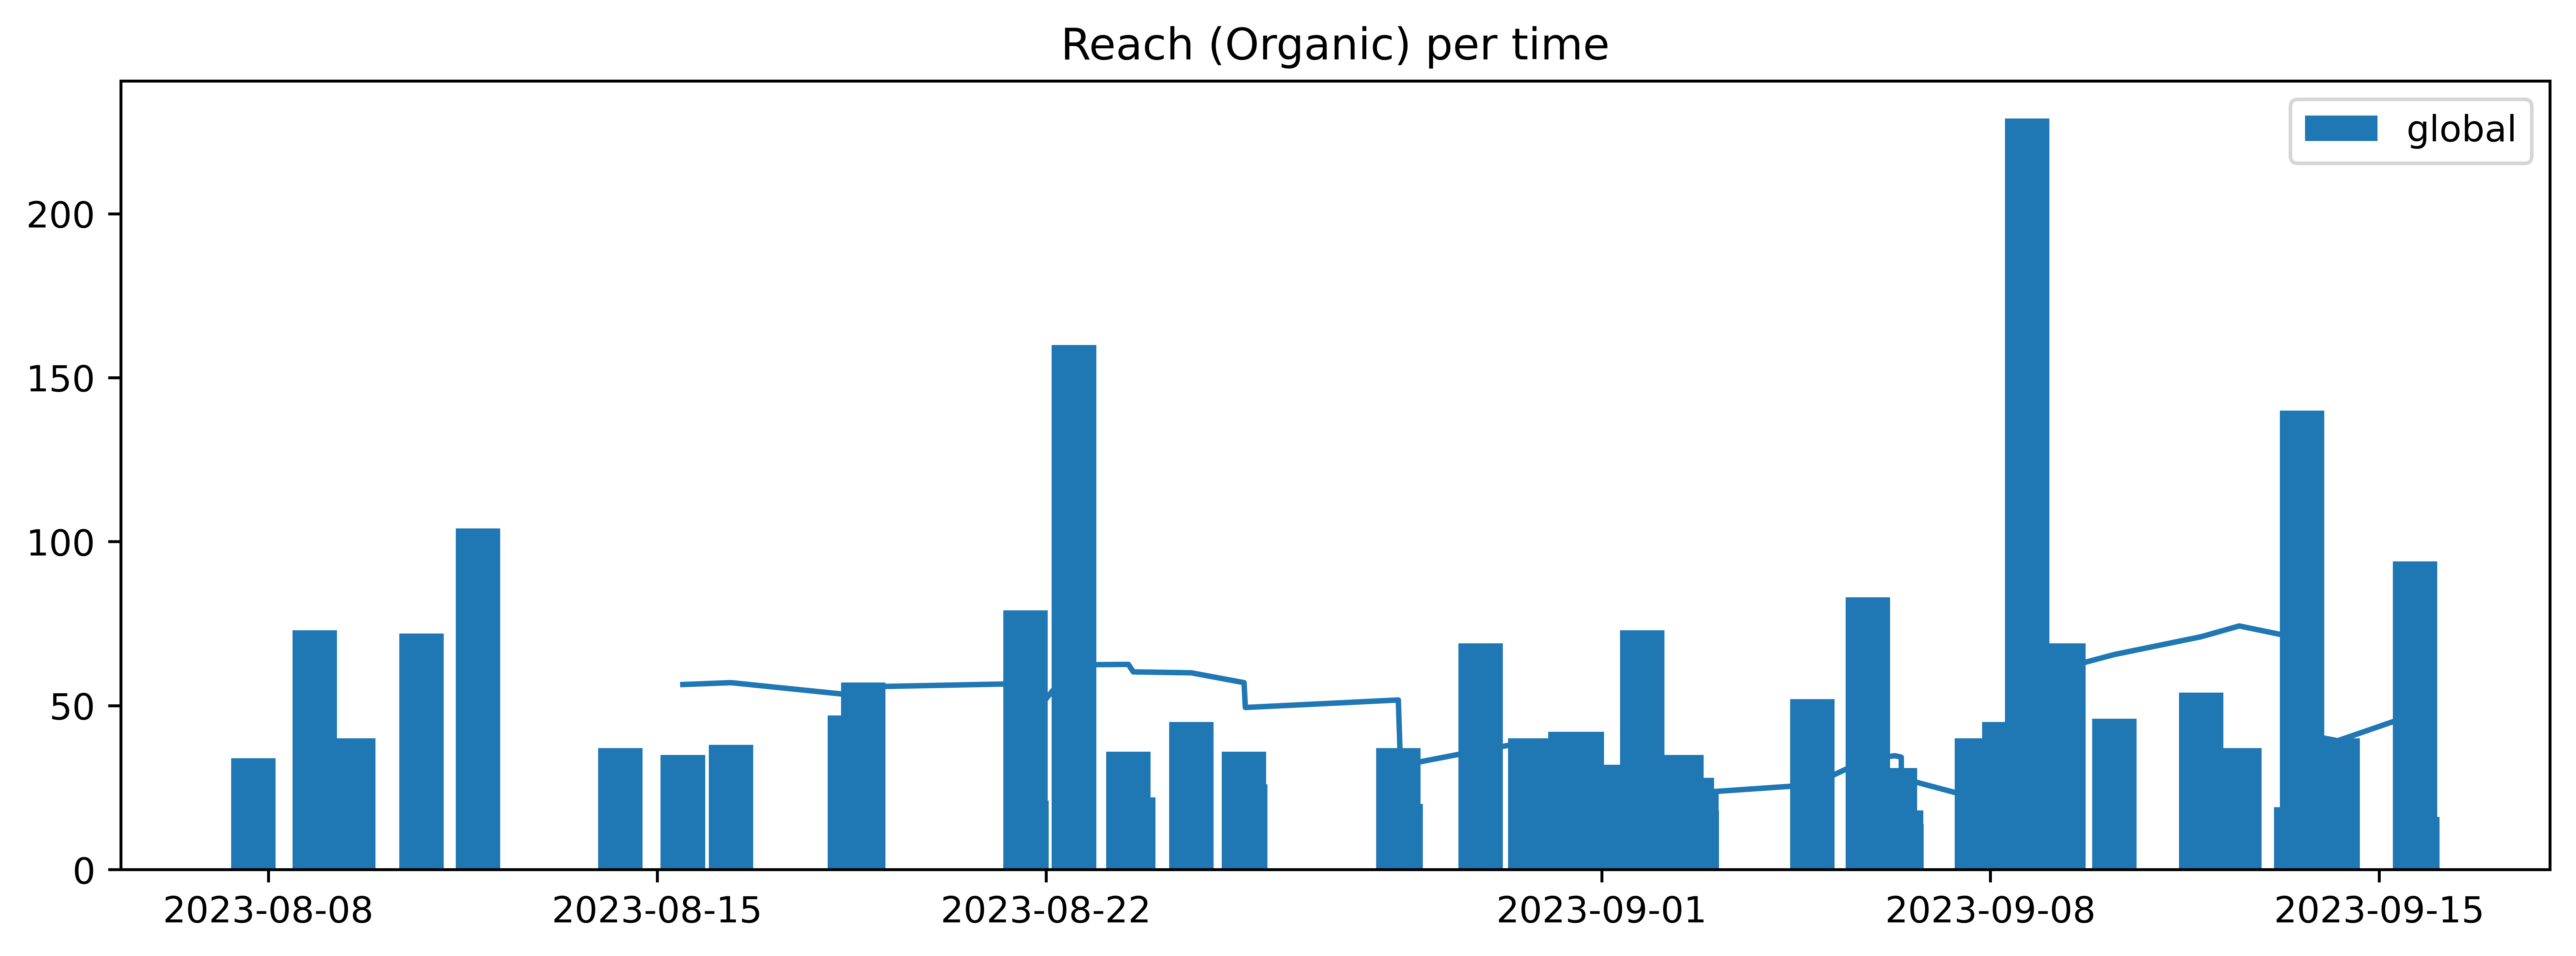

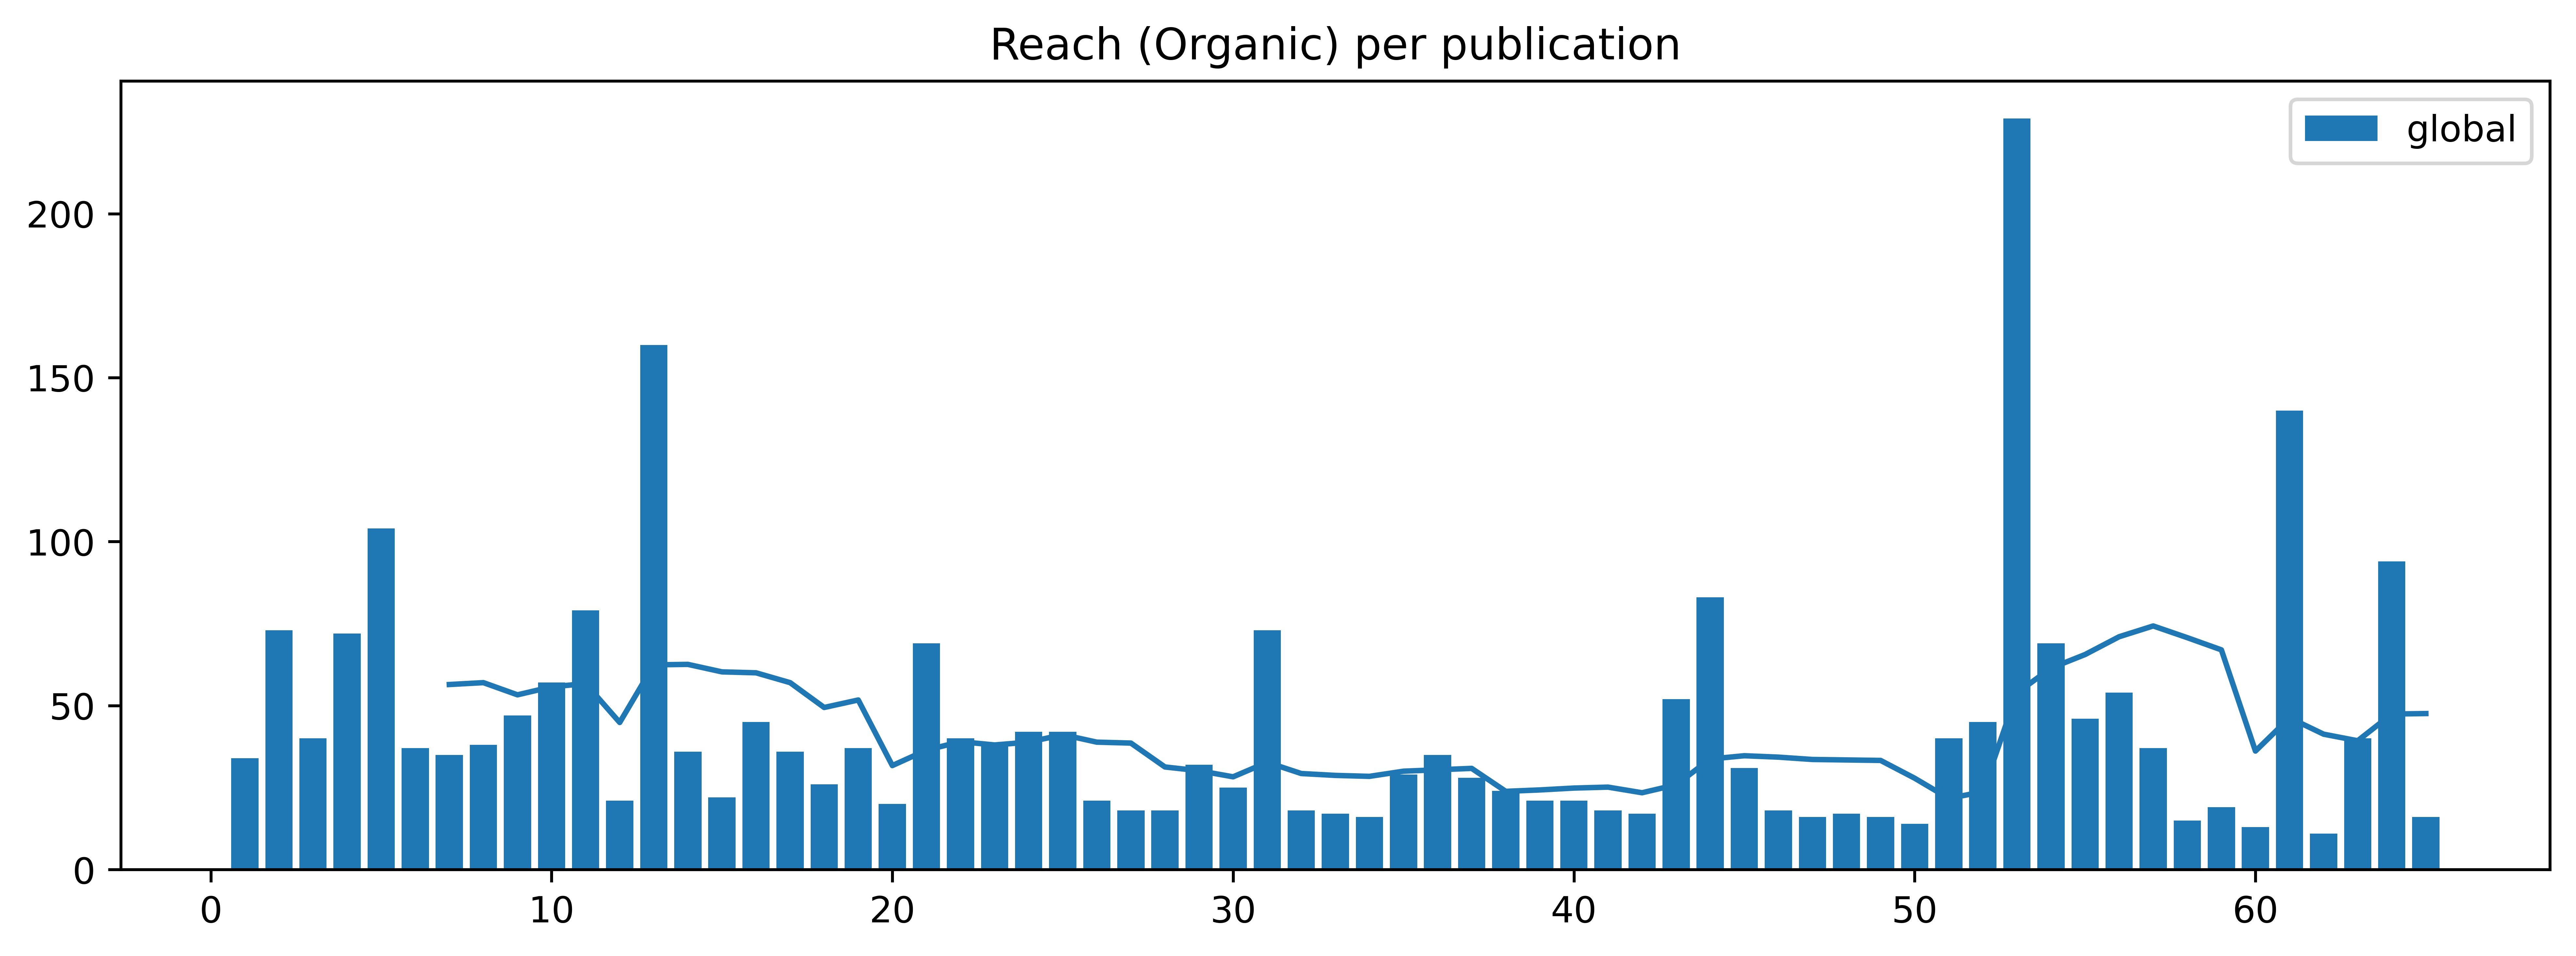

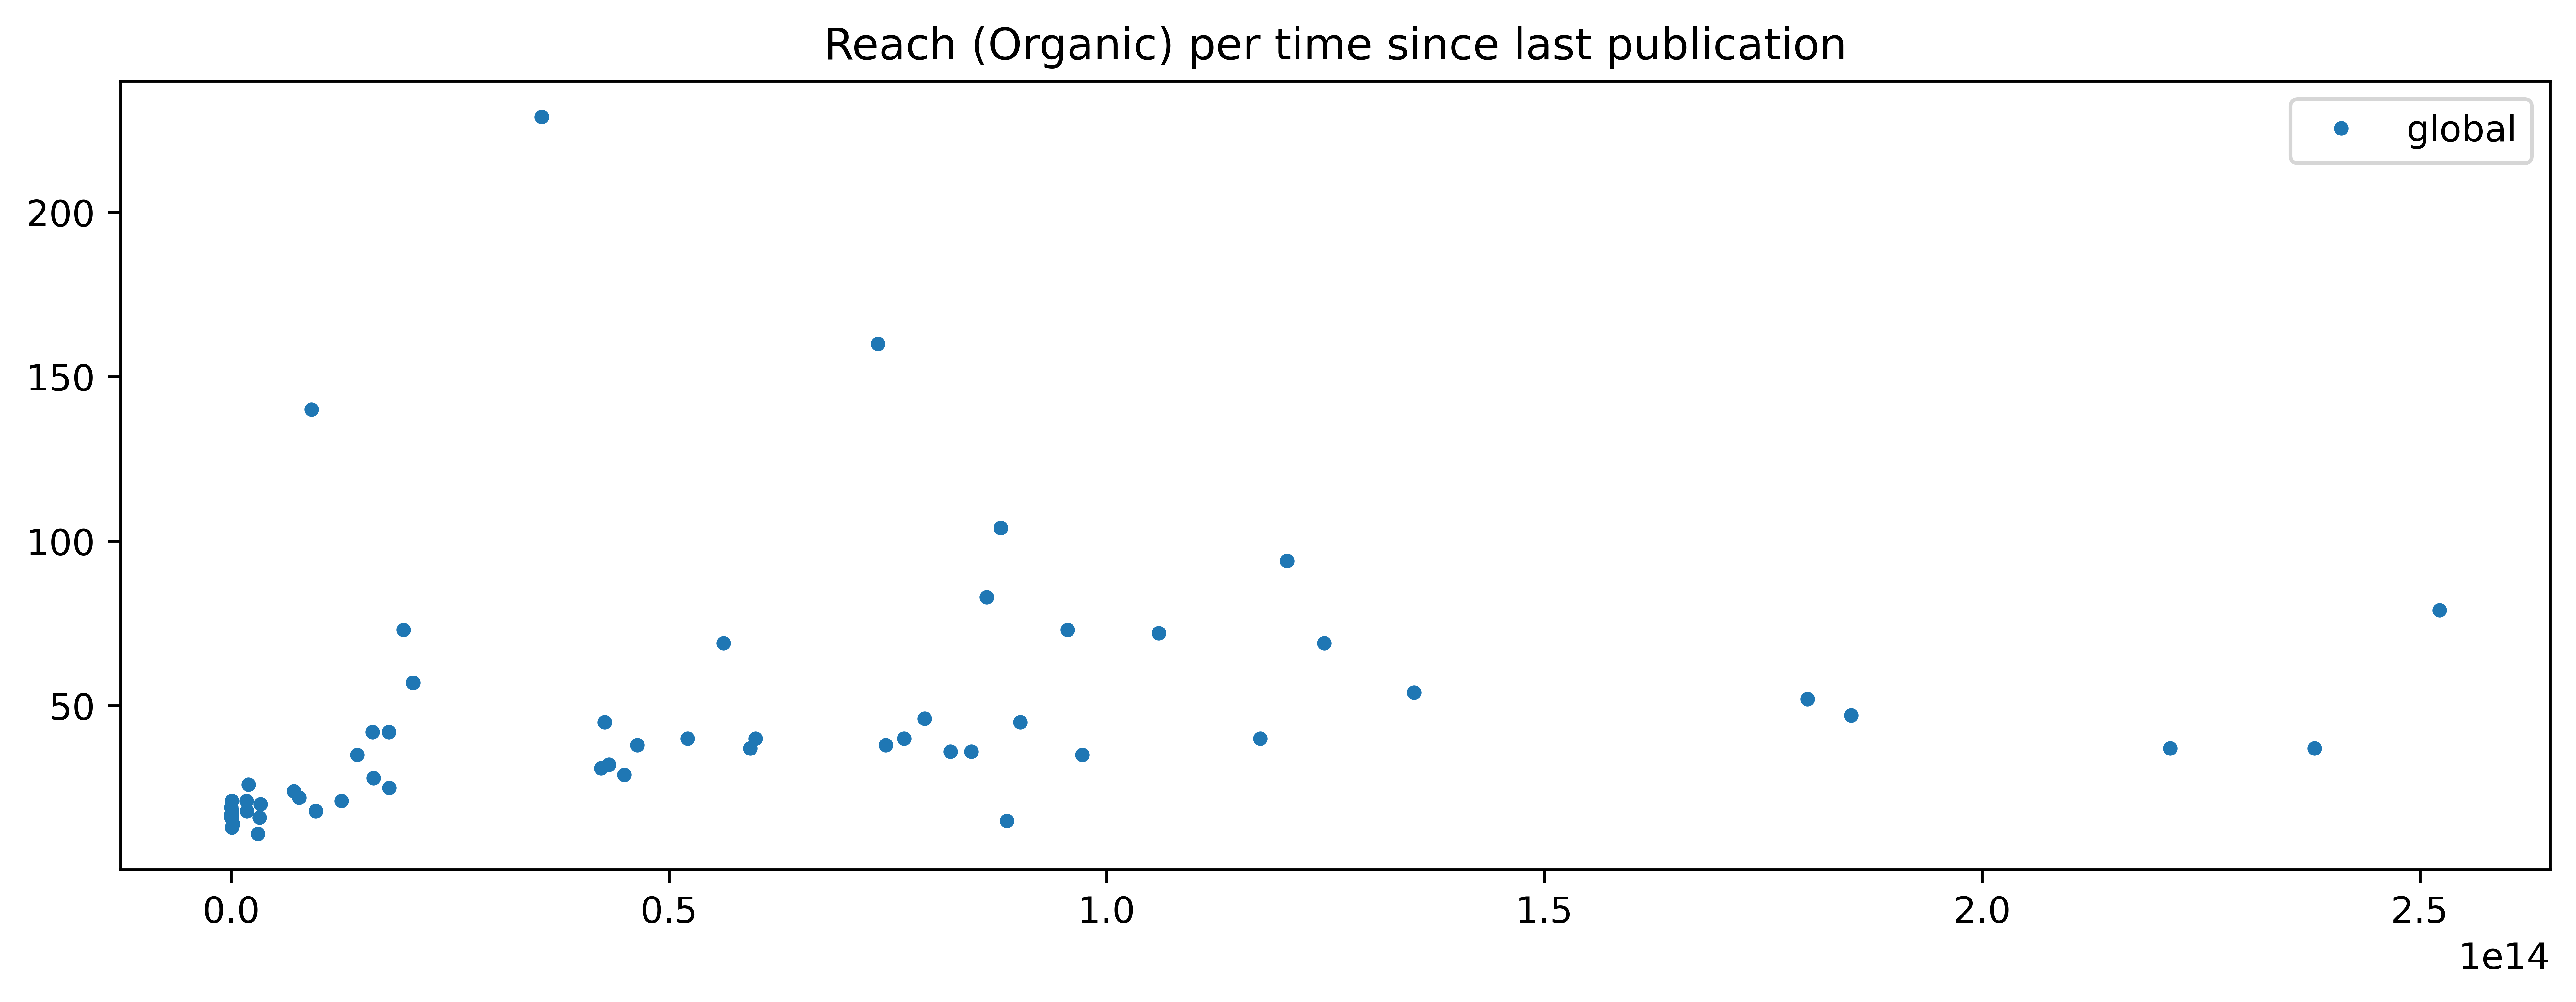

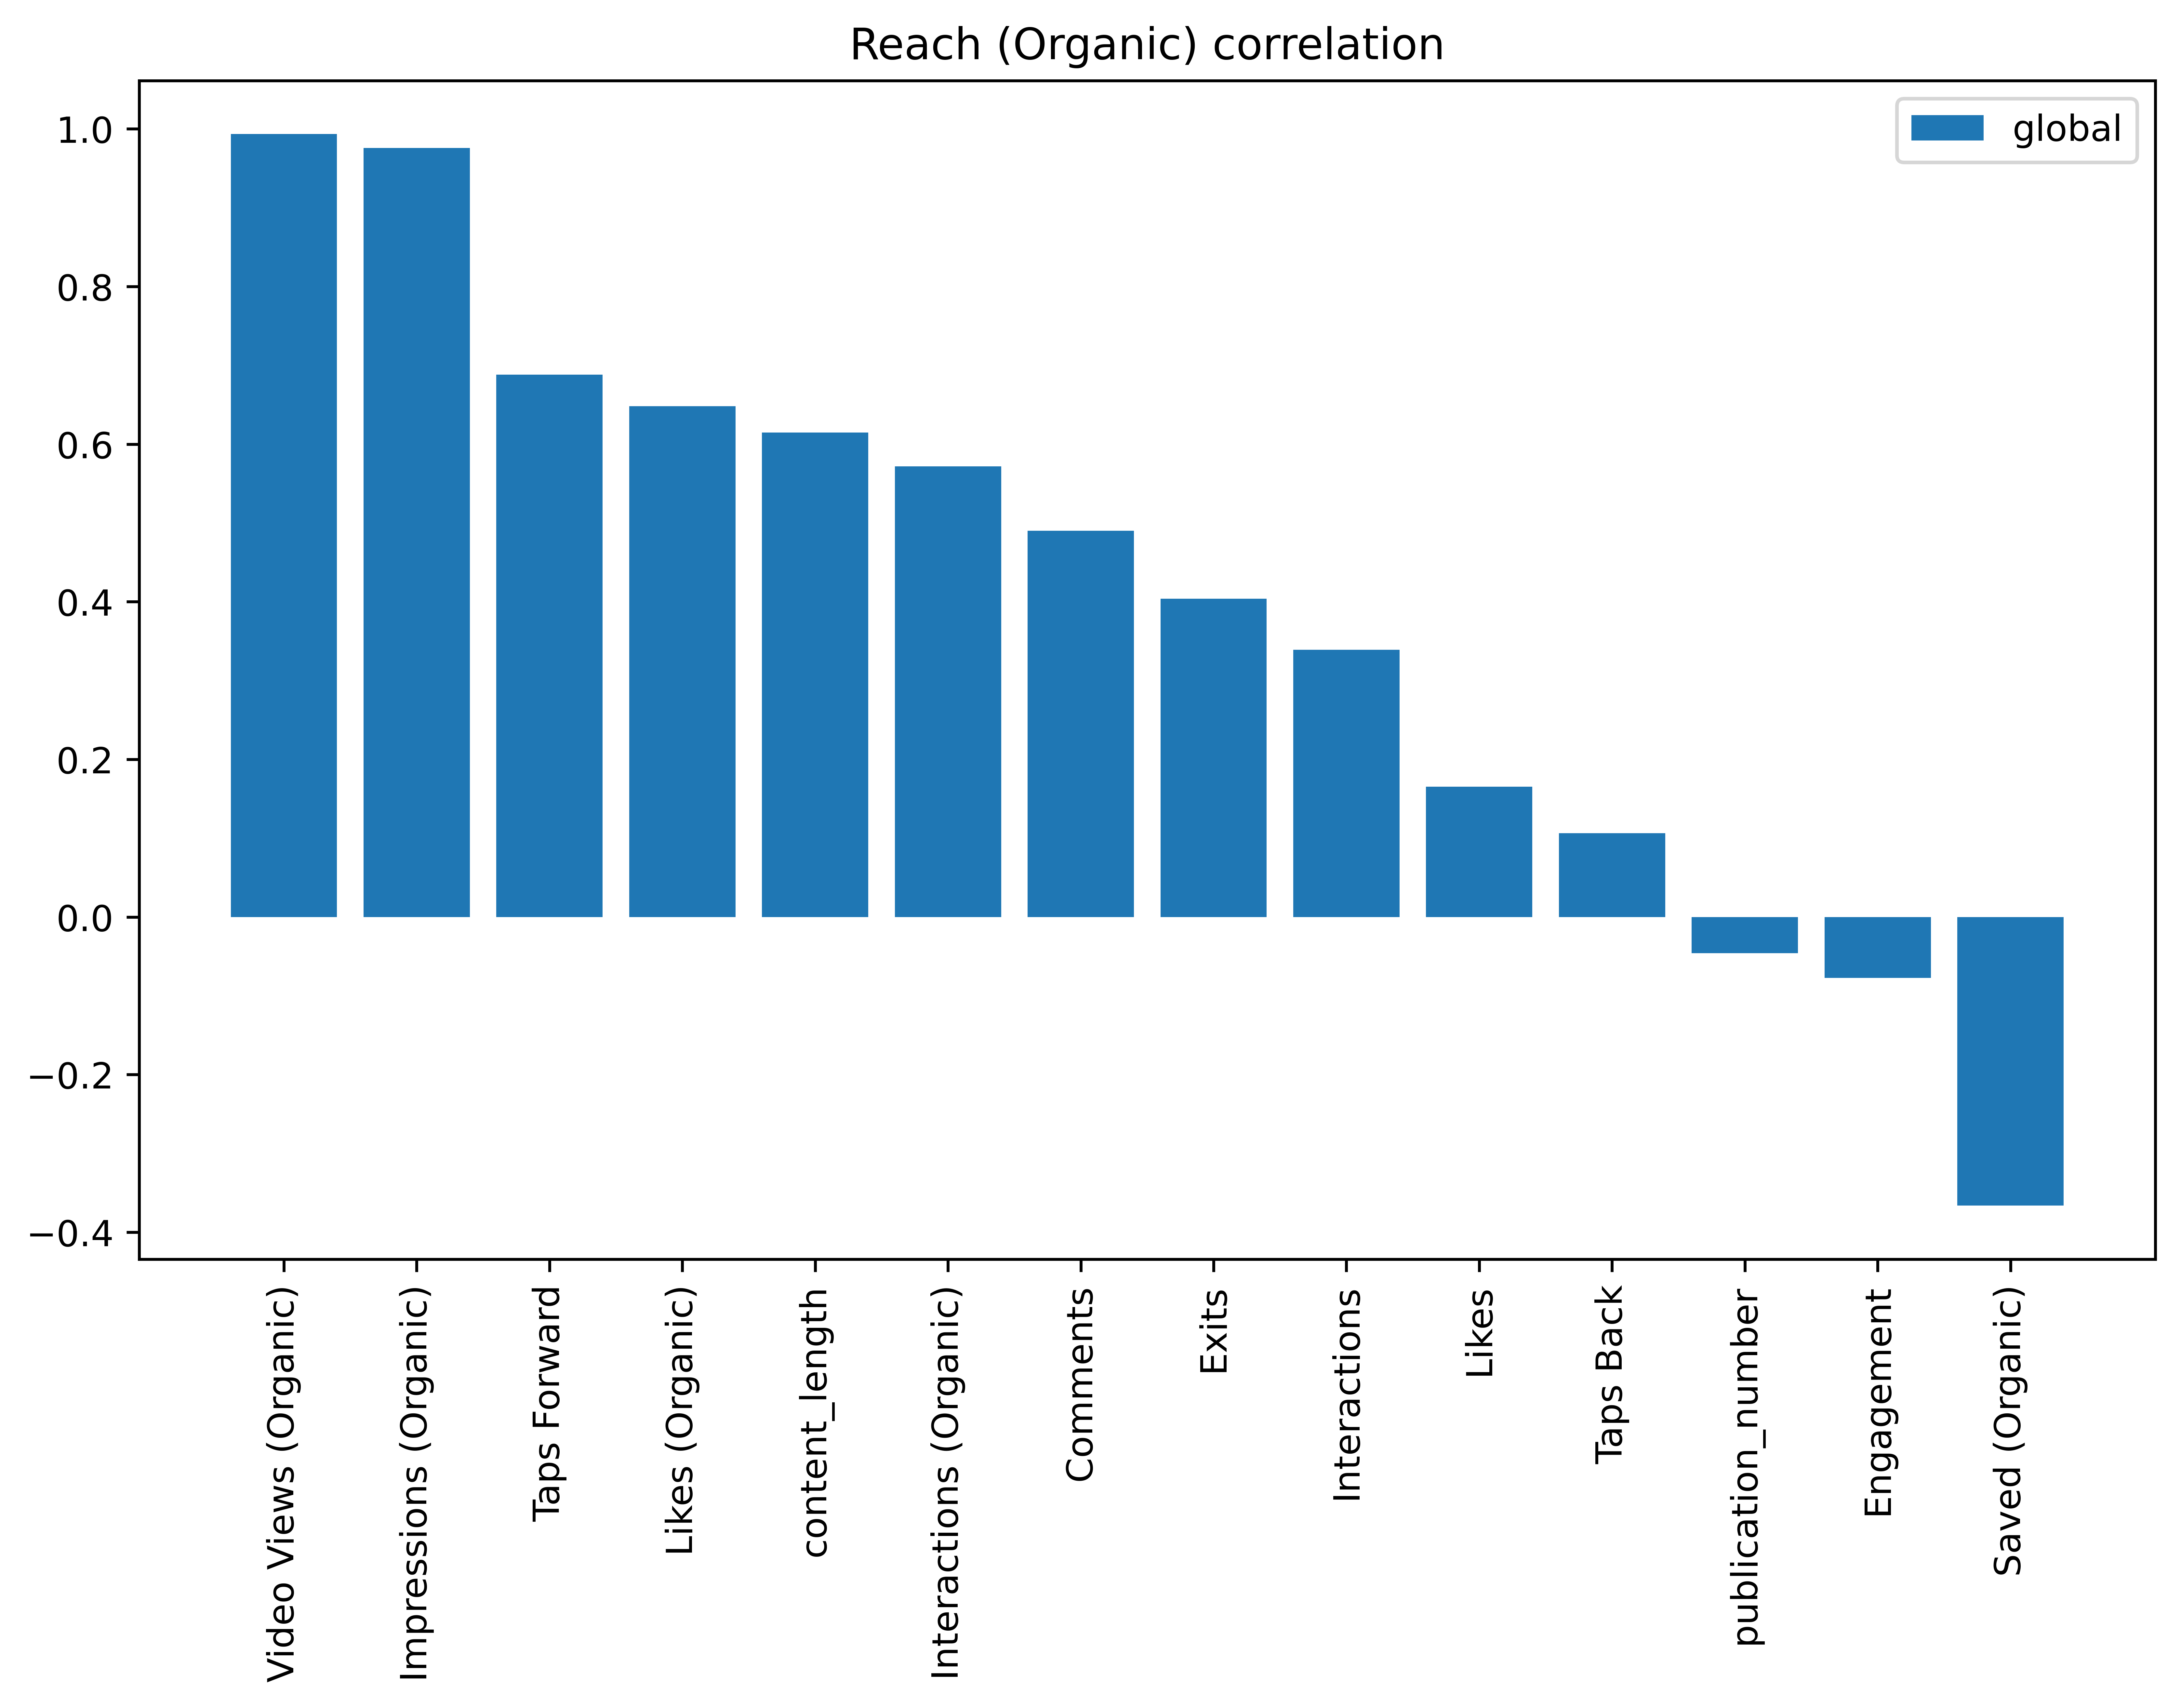

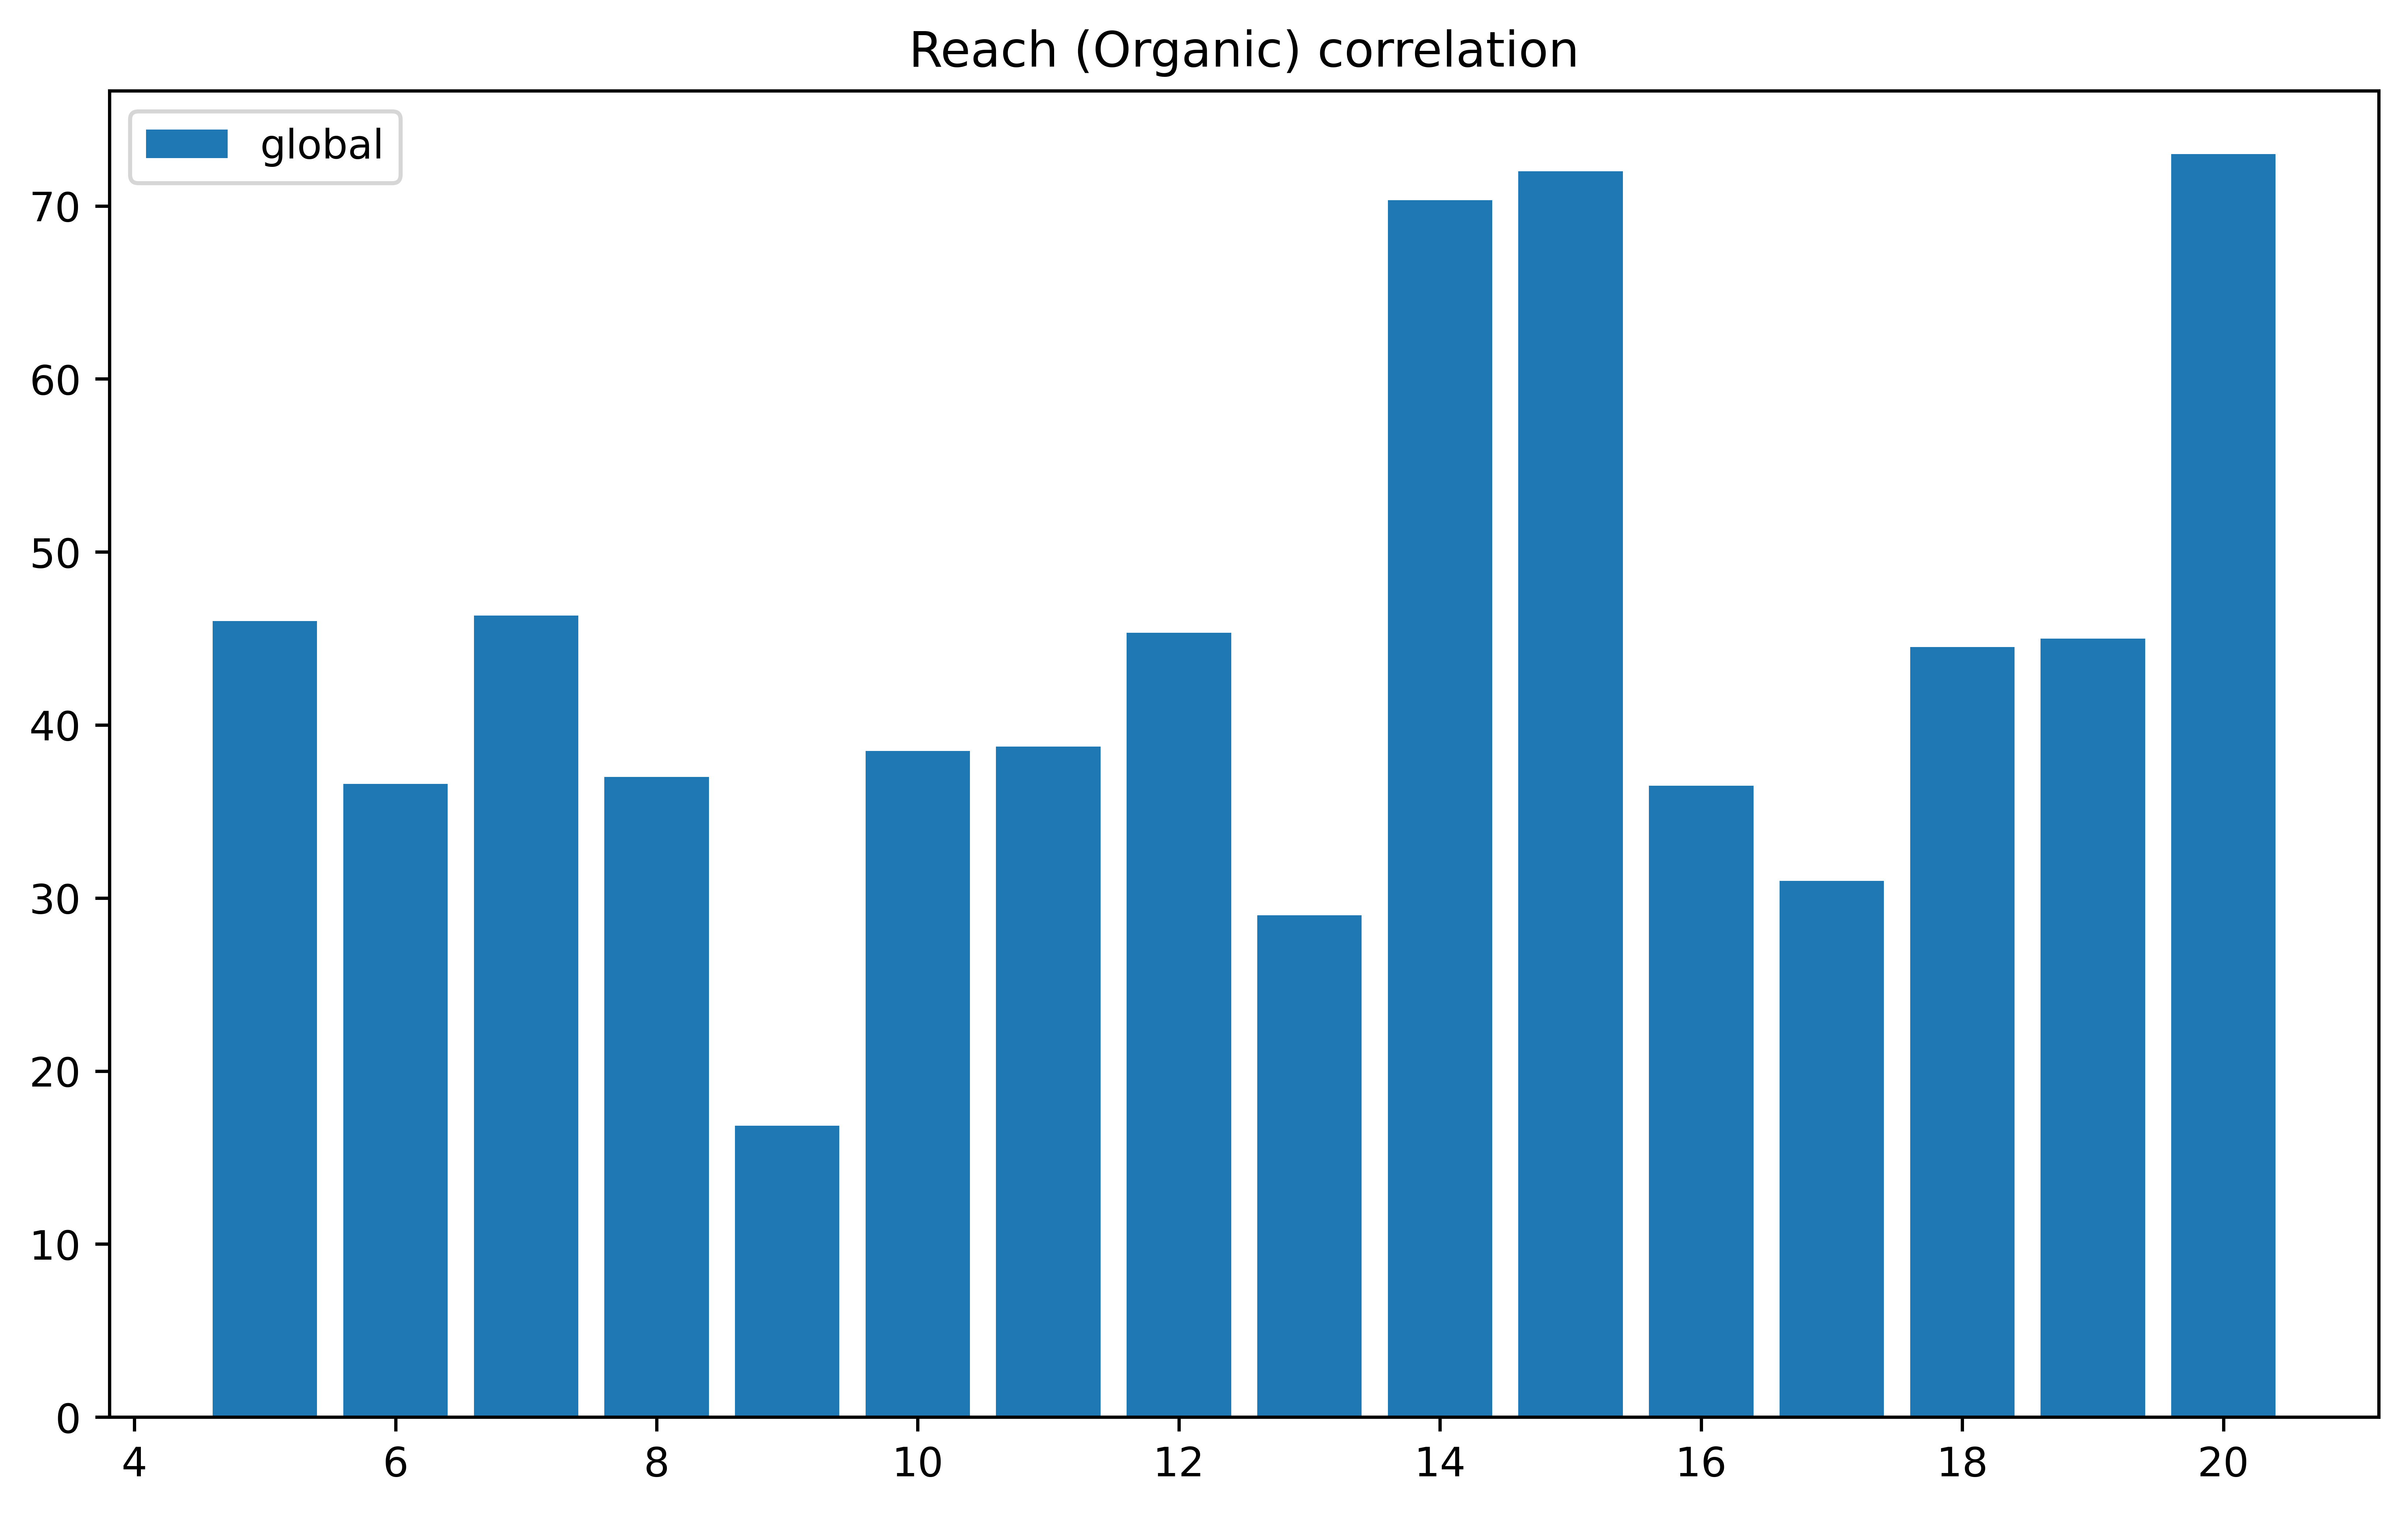

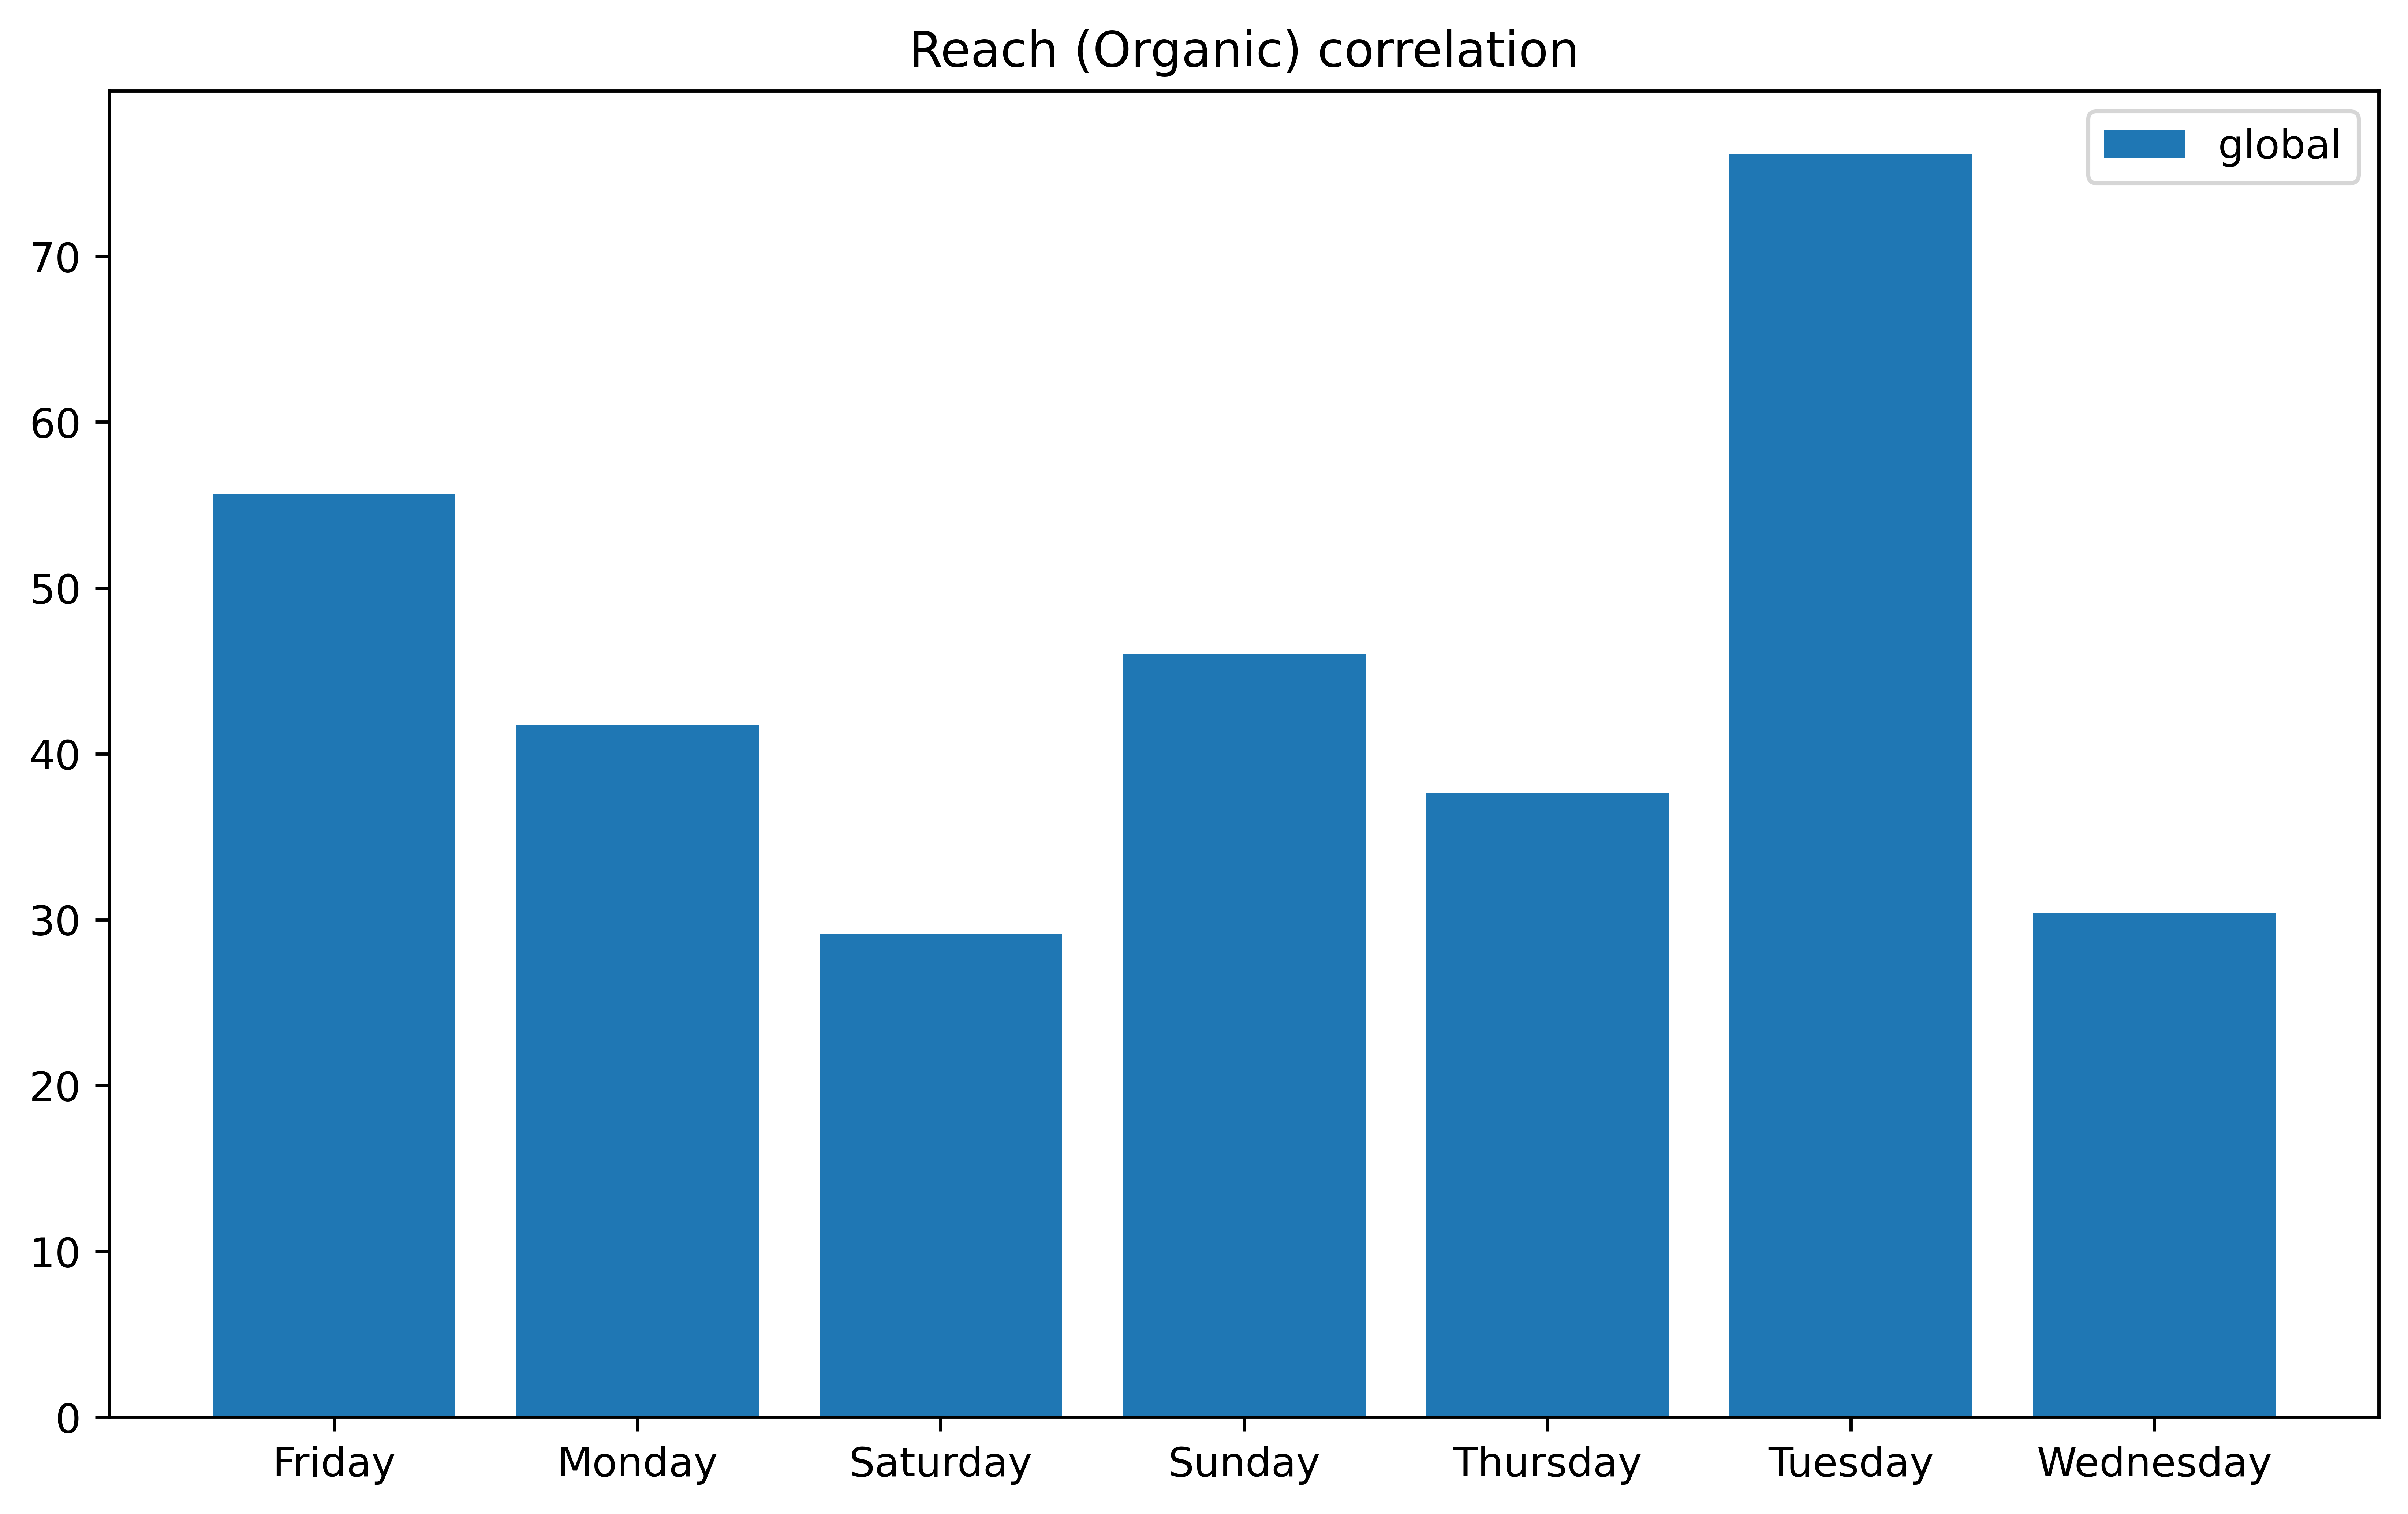

In [ ]:
# Plot different graph, allowing an analysis of the Reach during the communication campaign
plot.plot_chain(df_dict, 'Reach (Organic)', save_img_path=f'{IMG_PATH}/Reach')